In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as signal
import math
import matplotlib.image as mpimg

<class 'numpy.ndarray'> (64, 64)


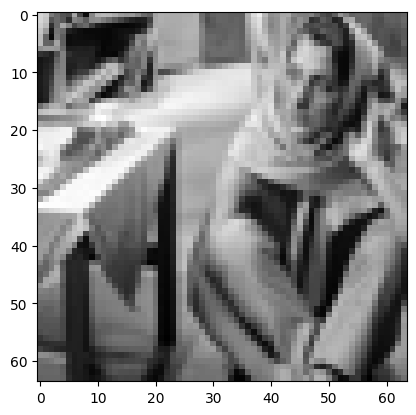

In [25]:
# read image
fname = '/home/twubi/deep-image-prior/Frames/images/im64.png'
Image = mpimg.imread(fname=fname)
#Image = np.array(range(10*10)).reshape(10,10)
print(type(Image),Image.shape)
plt.imshow(Image,cmap='gray')

In [37]:
16**4 * 512**2

17179869184

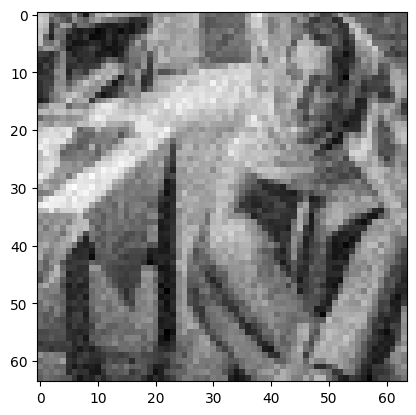

In [26]:
sigma = 10/255
D = Image.shape[0] 
noisy_img = (Image + sigma*np.random.randn(D, D)); 	# add noise
noisy_img[noisy_img > 1] = 1; 
noisy_img[noisy_img < 0]   = 0; 
plt.imshow(noisy_img,cmap='gray')

In [27]:
## Input 
#image g 


#Image = np.random.random((128,128)) #read(fname)
g = noisy_img.copy()
#D = g.shape[0] #128
N = D**2
K = 100 # iter number
Lambda = 0.1 # thresholding 
r = 16 # kernel size
r_2 = r**2 
num_filter = r_2

## Frame: convolution kernel
A = np.zeros((num_filter,r,r))  #2D r by r
A_flat_mat = np.zeros((r_2,num_filter))
G = np.zeros((N,r,r))  #?  r*r patches of g, from conv with a 
G_flat_mat = np.zeros((r_2,N))
G_flat_mat_T= np.zeros((N,r_2))
V_coded = np.zeros((num_filter,D,D))
#V_coded_flat = np.zeros((N,num_filter))
V_flat_mat = np.zeros((num_filter,N)) # V in paper
Vc_flat_mat_T = np.zeros((num_filter,N))  #with T effect, V in paper
#GTV = np.zeros((r_2,r_2)) #
VGT = np.zeros((num_filter,r_2)) #  num_filter,r_2


In [36]:
## W and thresh
def W_analysis(A,g,V):  # Sg(-.) correlation 0trans Wg
    num_filter = A.shape[0]
    for i in range(num_filter):
        V[i,:,:] = signal.correlate2d(g,A[i,:,:],'same','wrap')
    
    return V
        
        
def W_synthesis(A,V,g): #WTg
    num_filter = A.shape[0]
    D = g.shape[0]
    g_denoise = np.zeros((D,D))
    for i in range(num_filter):
        g_denoise += signal.convolve2d(V[i,:,:],A[i,:,:],'same','wrap')
    
    return g_denoise
    

def thresholding(Lambda,V):
    mask = (V < Lambda)
    V[mask] = 0
    return V


In [8]:
# see as numpy matrix
def square_to_vector(V_coded,V_flat_mat):
    # V_coded = np.zeros((num_filter,D,D))
    # V_flat_mat = np.zeros((num_filter,N))  #with T effect
    # if G image 
    num_filter = V_coded.shape[0]
    D = V_coded.shape[1]
    N = V_flat_mat.shape[1]
    return (V_coded.reshape(( num_filter,N))).T

def vector_to_square(V_flat_mat,V_coded): # V_codes change!
    # A = np.zeros((num_filter,r,r))  #2D r by r
    # A_flat_mat = np.zeros((r_2,num_filter))
    num_filter = V_coded.shape[0]
    r = V_coded.shape[1] #or D
    r_2 = r*r #or N = D*D
    for i in range(num_filter):
        V_coded[i,:,:] = V_flat_mat[:,i].reshape((r,r))
    return V_coded
def flat(g,A):  # g -> G position patch ??  G r^2 * N
    #G = np.zeros((N,r,r))  #?  r*r patches of g, from conv with a 
    #only use the shape of A
    """
    Construct matrix from conv operator
    """
    D = g.shape[0]
    r = A.shape[1]
    r_2 = r*r
    N = D*D
    G2 = np.zeros((N,r,r))
    # Construc id matrix A2
    A2 = np.zeros((r,r,r,r)) 
    for i in range(r):
        for j in range(r):
            A2[i,j,i,j] = 1
    A2 = A2.reshape((r_2,r,r))
    G3 = np.zeros((r_2,D,D))
    G3 = W_analysis(A2,g,G3) #G3 r_2 D,D
    
    return G3.reshape(r_2,N),A2/r

In [11]:
# test G
A = np.random.random((r_2,r,r))
G_flat_mat = flat(g,A)

#test_G(g,G_flat_mat,threshold = 1e-12)
A = np.random.random((r_2,r,r))
A_flat_mat = np.zeros((r_2,r_2))
A_flat_mat = square_to_vector(A,  A_flat_mat)
V1_code = np.zeros((r_2,D,D))
V1_code = W_analysis(A,g,V1_code) #r_2*D*D
V2_code = (A_flat_mat.T @ G_flat_mat).T #r_2 * N -> N * r_2
V2_code = vector_to_square(V2_code,V1_code.copy())
difference = np.linalg.norm(V1_code - V2_code)
#print(difference)

# for i in range(233):
#     test_G(g,G_flat_mat,threshold = 1e-12)

/tmp/ipykernel_1127788/3014204066.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  V2_code = (A_flat_mat.T @ G_flat_mat).T #r_2 * N -> N * r_2


ValueError: could not broadcast input array from shape (4,4096) into shape (4,)

In [32]:
image_name = 'barbara.png'
fname = os.join('/home/twubi/deep-image-prior/Frames/images/',image_name)
print(fname)


NameError: name 'os' is not defined

In [31]:
fname 

'b/home/twubi/deep-image-prior/Frames/images/a/home/twubi/deep-image-prior/Frames/images/r/home/twubi/deep-image-prior/Frames/images/b/home/twubi/deep-image-prior/Frames/images/a/home/twubi/deep-image-prior/Frames/images/r/home/twubi/deep-image-prior/Frames/images/a/home/twubi/deep-image-prior/Frames/images/./home/twubi/deep-image-prior/Frames/images/p/home/twubi/deep-image-prior/Frames/images/n/home/twubi/deep-image-prior/Frames/images/g'

In [ ]:
G_flat_mat,
## G_flat_mat_T
G_flat_mat_T = flat(g,A).T
# Test 4

def test_G(g,G_flat_mat,threshold = 1e-13):
    #G_flat_mat r_2 * N
    D = g.shape[0]
    r = G.shape[1]
    r_2 = r*r
    N = G.shape[0]
    A = np.random.random((r_2,r,r))
    A_flat_mat = np.zeros((r_2,r_2))
    A_flat_mat = square_to_vector(A,  A_flat_mat)
    V1_code = np.zeros((r_2,D,D))
    V1_code = W_analysis(A,g,V1_code) #r_2*D*D

    V2_code = (A_flat_mat.T @ G_flat_mat).T #r_2 * N -> N * r_2
    V2_code = vector_to_square(V2_code,V1_code.copy())

    difference = np.linalg.norm(V1_code - V2_code)
    assert difference < threshold, f"|p1 - p2| = {difference}"
    
image_patches = vector_to_square(G_flat_mat,G)
image_patches.shape
image_patches[0]


array([[99., 90., 91., 92., 93., 94., 95., 96., 97., 98.,  9.,  0.,  1.,
         2.,  3.,  4.,  5.,  6.,  7.,  8., 19., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 29., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 39., 30., 31., 32., 33., 34., 35., 36., 37., 38., 49., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 59., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 69., 60., 61., 62., 63., 64., 65., 66.,
        67., 68., 79., 70., 71., 72., 73., 74., 75., 76., 77., 78., 89.,
        80., 81., 82., 83., 84., 85., 86., 87., 88.],
       [90., 91., 92., 93., 94., 95., 96., 97., 98., 99.,  0.,  1.,  2.,
         3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
        55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67

In [35]:
int((4)**(1/2))

2

In [ ]:
# test W_systhesis
def test_sys(V_flat_mat,g,G_flat_mat,threshold = 1e-13):
    #G_flat_mat r_2 * N
    N = G_flat_mat.shape[1]
    D = int(N**(1/2))
    r_2 = G_flat_mat.shape[0]
    r = int(r_2**(1/2))
    
    A = np.random.random((r_2,r,r))
    A_flat_mat = np.zeros((r_2,r_2))
    A_flat_mat = square_to_vector(A,  A_flat_mat)
    V_coded = vector_to_square(V_flat_mat)
    

    g1 = W_synthesis(A,V_codes,g)#r_2*D*D

    V2_code = (A_flat_mat @ G_flat_mat).T #r_2 * N -> N * r_2
    V2_code = vector_to_square(V2_code,V1_code.copy())


    difference = np.linalg.norm(g1 - g2)
    assert difference < threshold, f"|p1 - p2| = {difference}"

In [17]:
## Data and output
# 定义输出间隔
output_interval = 100

# 迭代计数器
iteration_count = 0

def snr(signal, noise):
    signal = np.reshape(signal,-1)
    noise = np.reshape(noise,-1)
    signal_power = np.sum(signal ** 2) / len(signal)
    noise_power = np.sum(noise ** 2) / len(noise)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

In [9]:
G_flat_mat,A = flat(g,A) #0-1bases A initialization and G_flat_mat
G_flat_mat_T = G_flat_mat.T


In [14]:
# test time - W_analysis(A,g,V_coded) and for is very slow!
import time

start_time = time.time()
#code_block()
V_coded = W_analysis(A,g,V_coded)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

    

Execution time: 40.98132848739624 seconds


In [15]:
start_time = time.time()
#code_block()
#V_coded = W_analysis(A,g,V_coded)
V_flat_mat = A_flat_mat.T @ G_flat_mat
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.37878847122192383 seconds


In [23]:
start_time = time.time()
#code_block()
V_coded = vector_to_square(V_flat_mat.T,V_coded)
# V_flat_mat = A_flat_mat @ G_flat_mat
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.45189642906188965 seconds


In [24]:
start_time = time.time()
#code_block()
A = vector_to_square(A_flat_mat,A)
# V_flat_mat = A_flat_mat @ G_flat_mat
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.002574920654296875 seconds


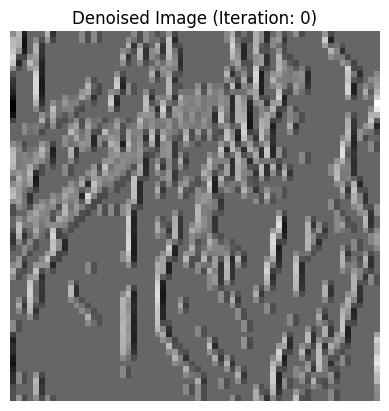

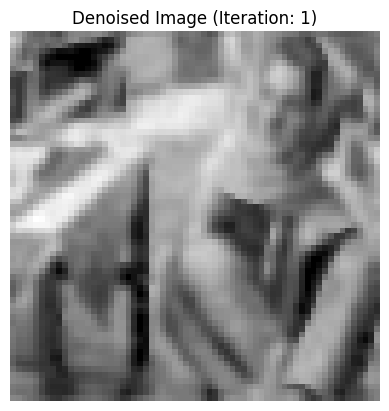

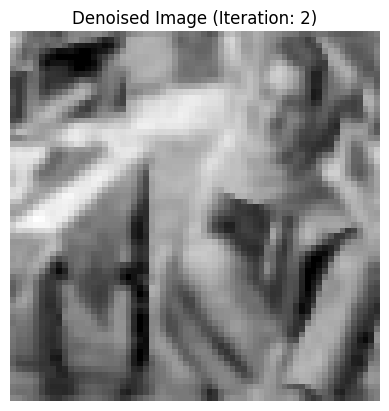

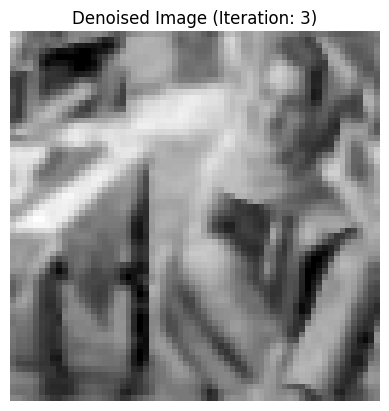

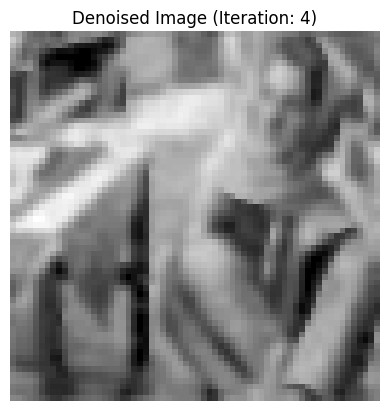

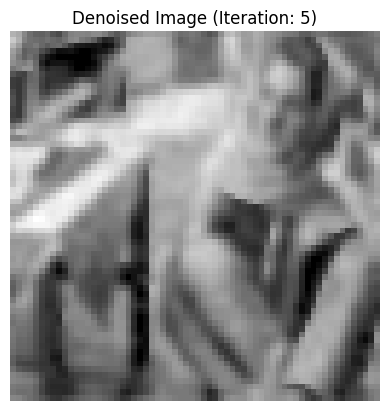

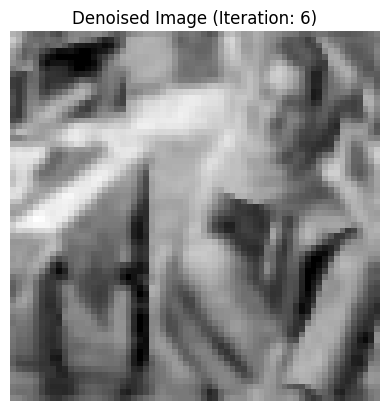

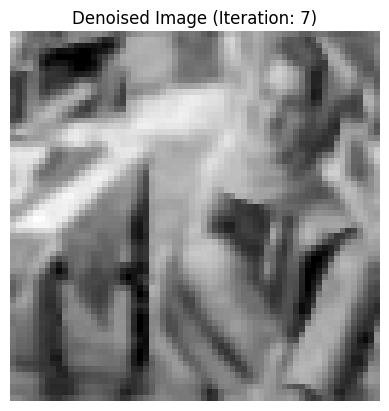

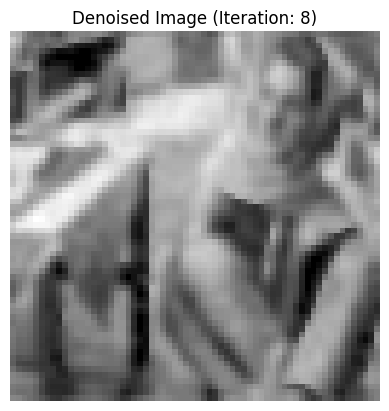

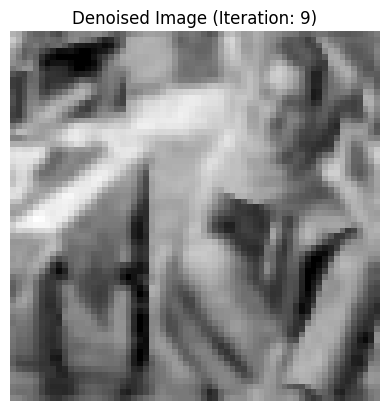

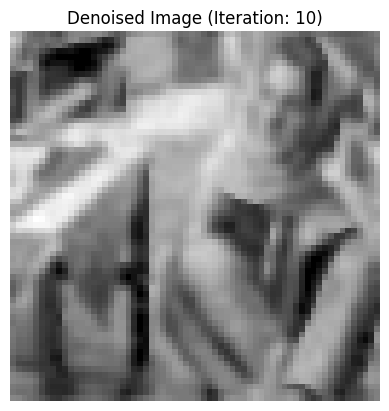

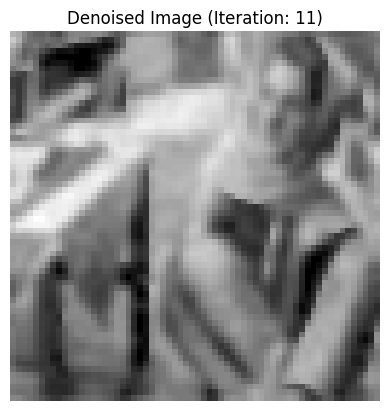

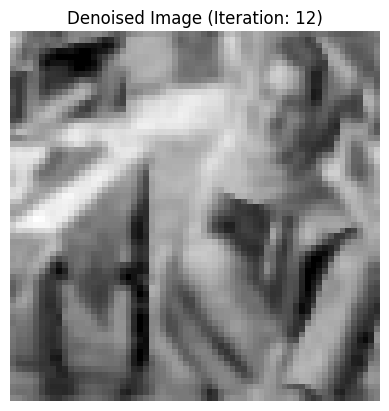

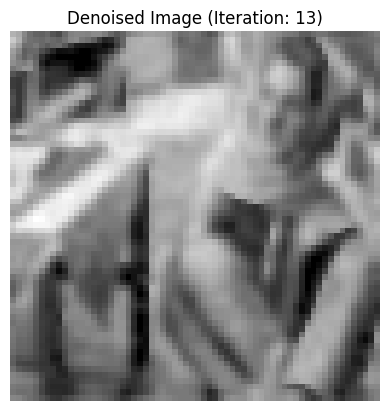

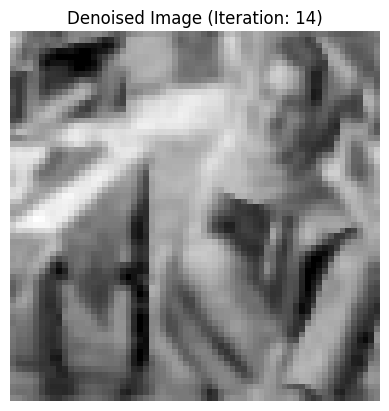

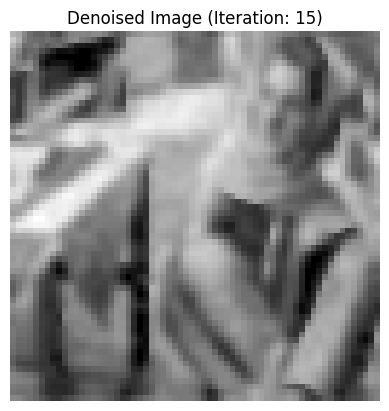

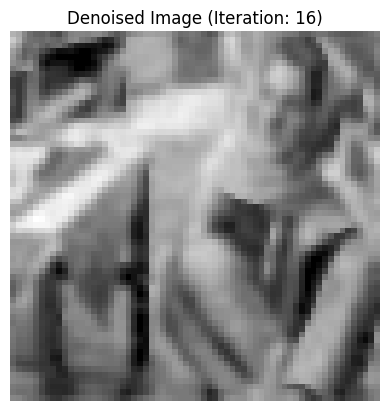

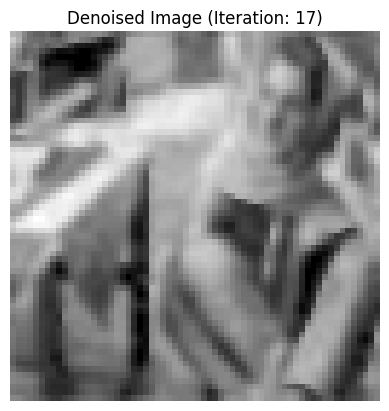

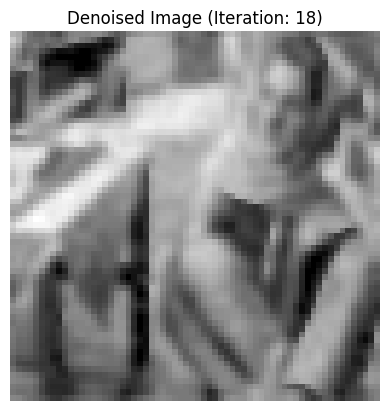

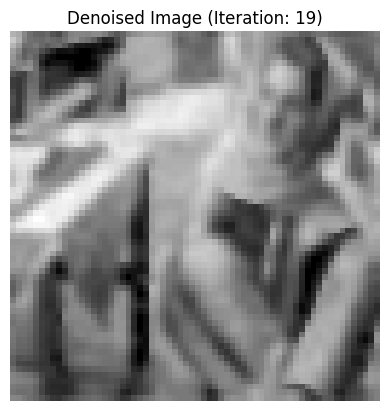

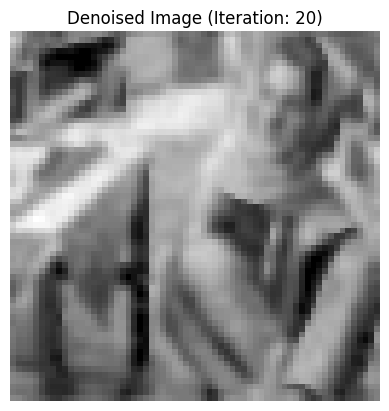

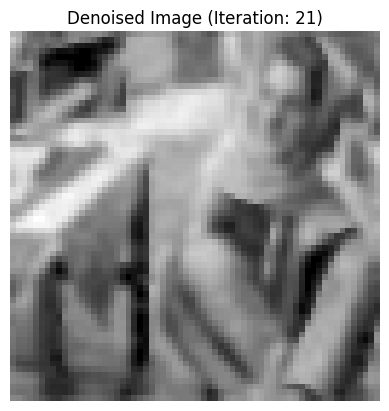

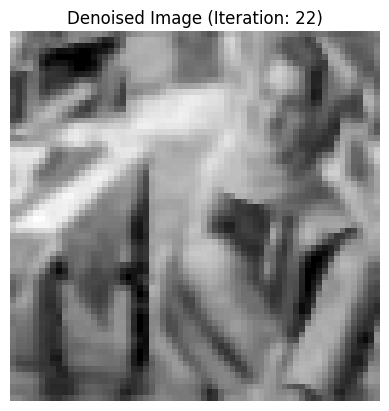

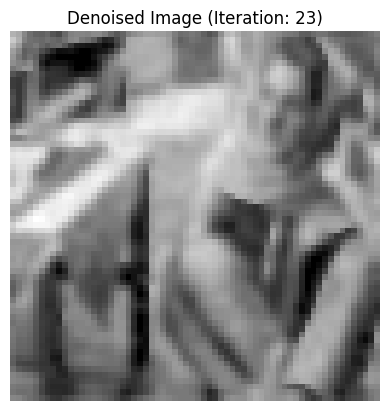

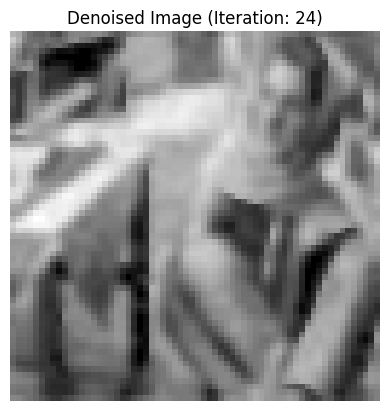

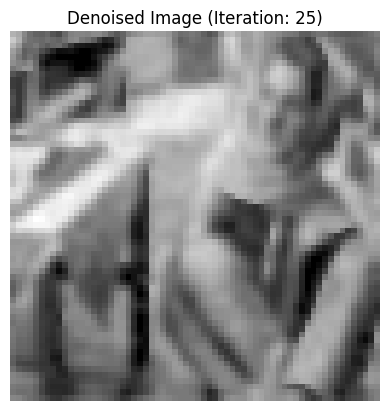

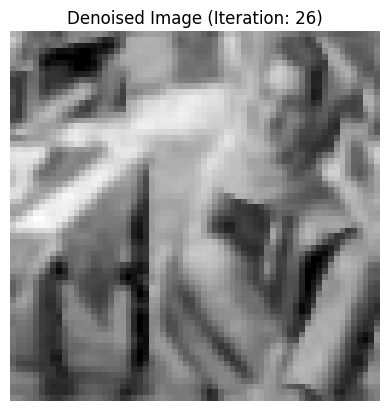

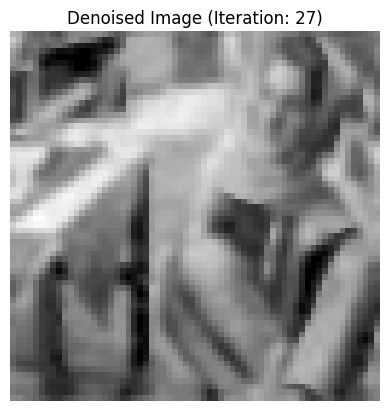

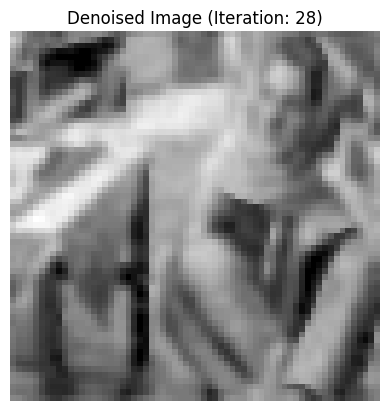

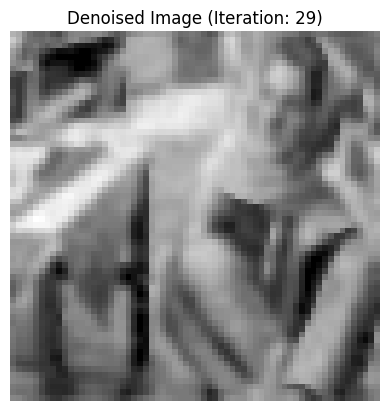

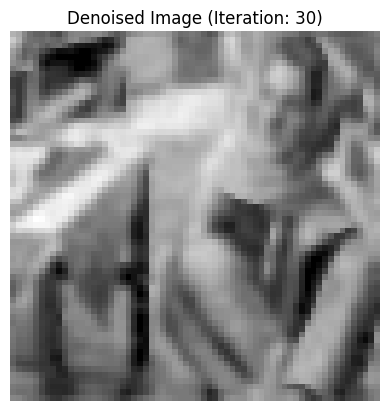

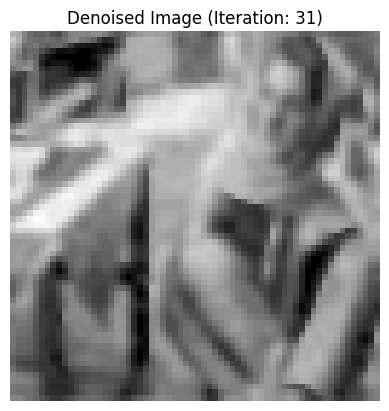

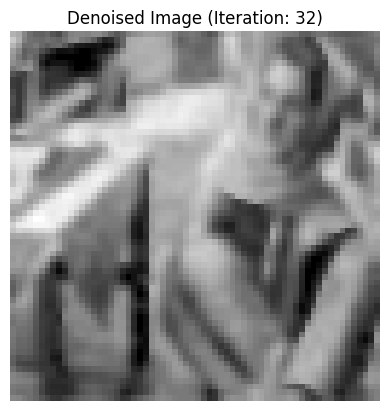

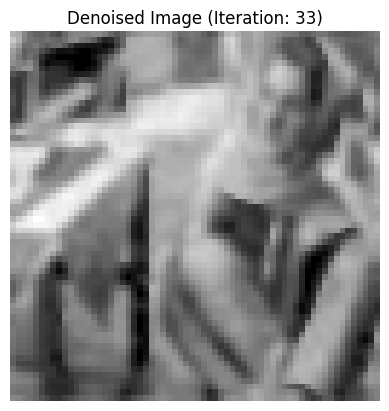

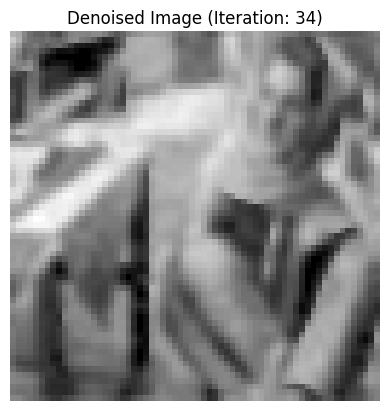

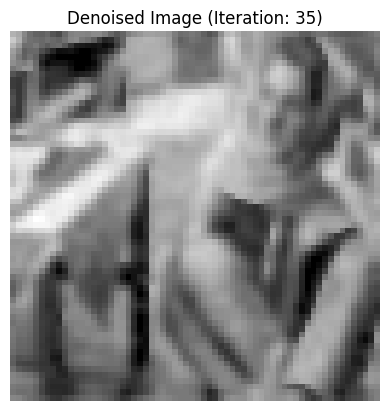

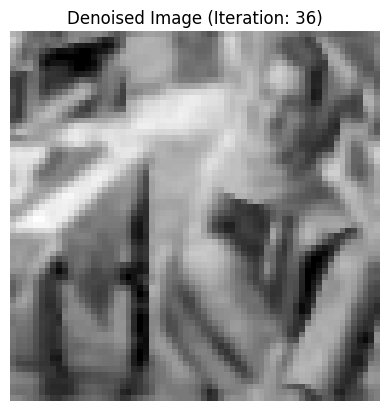

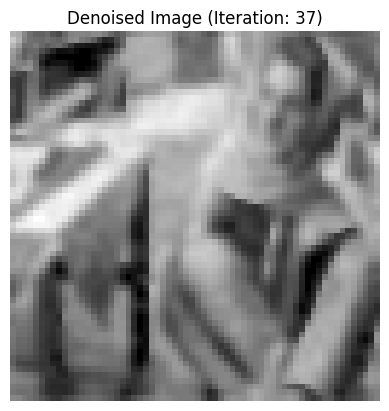

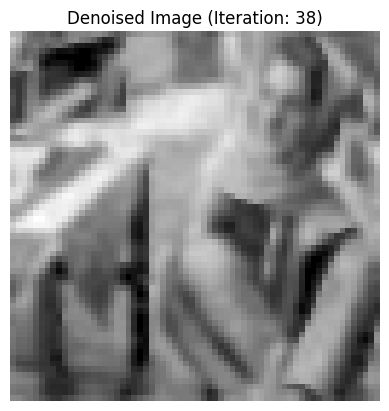

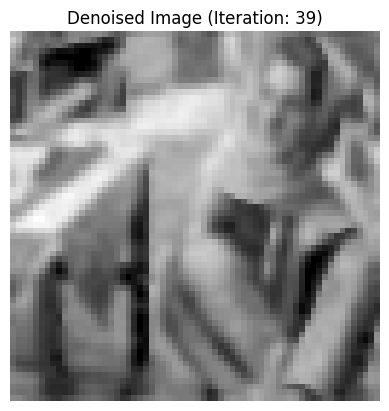

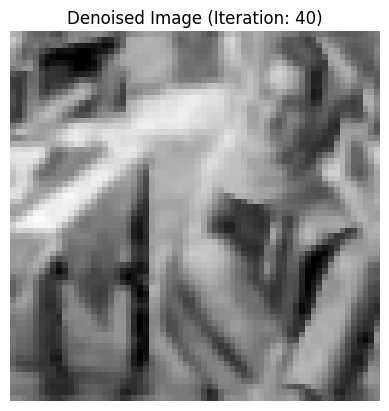

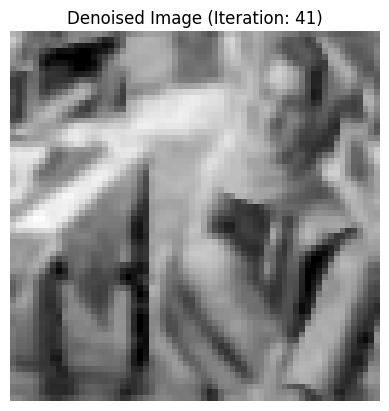

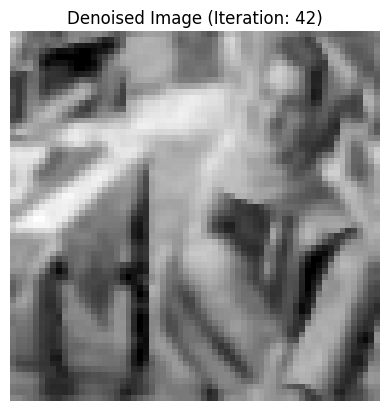

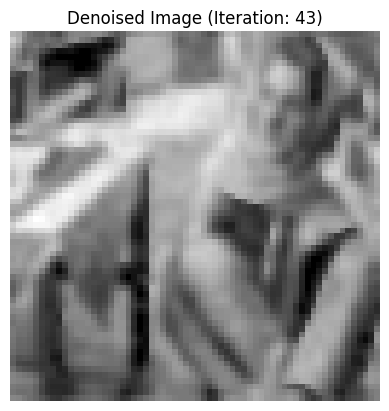

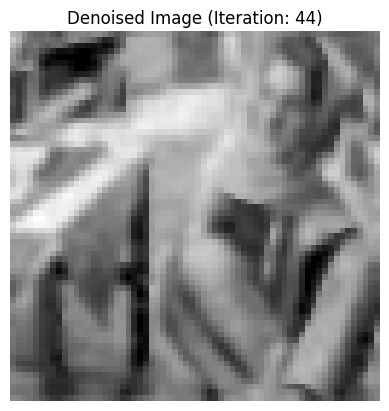

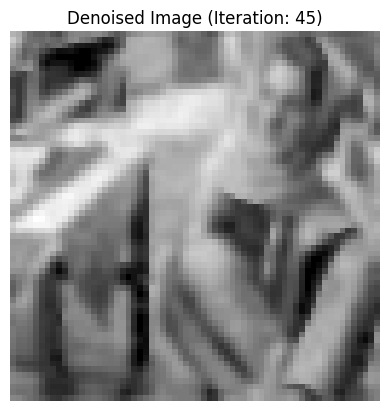

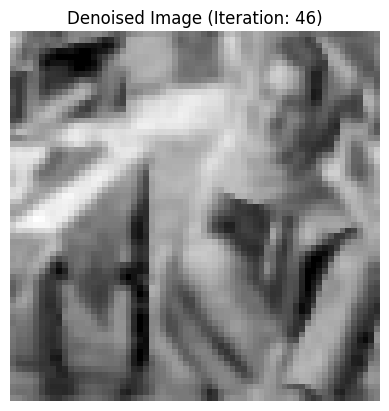

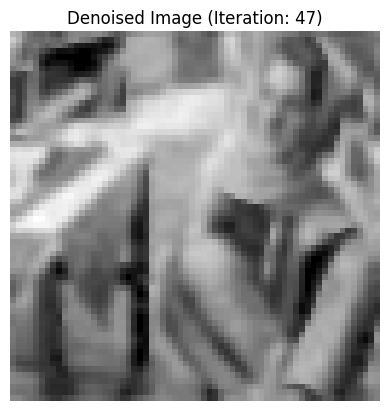

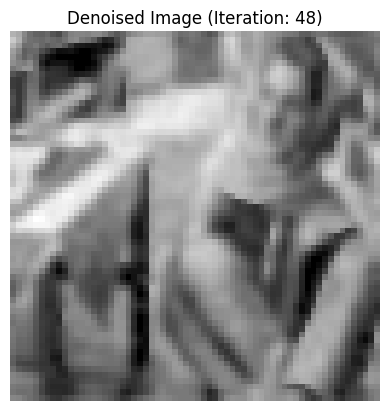

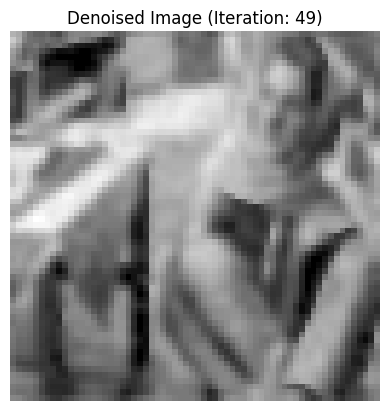

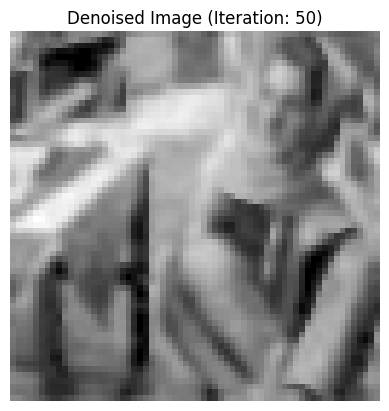

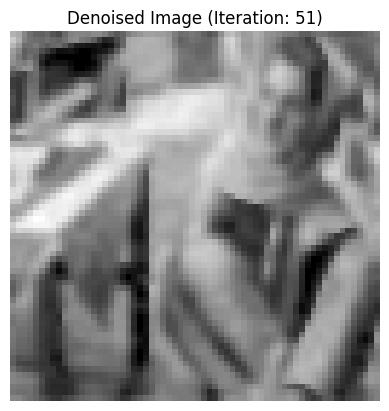

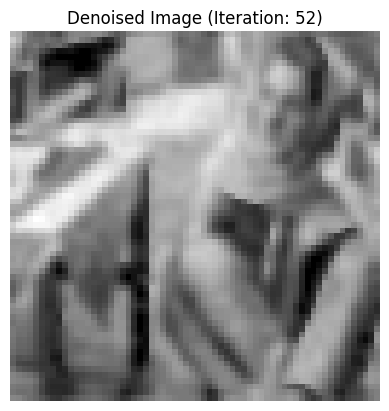

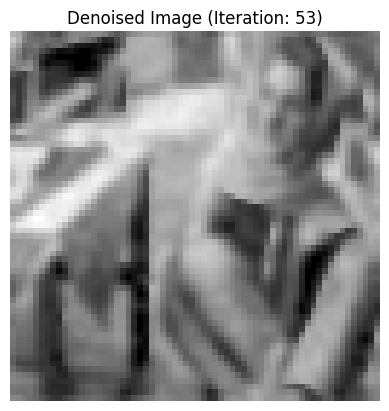

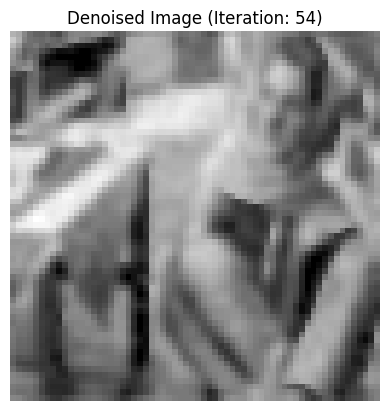

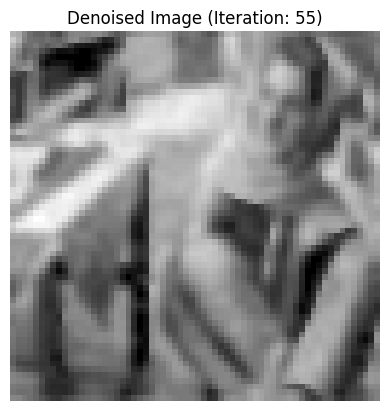

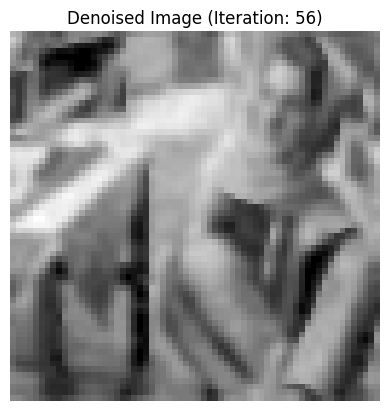

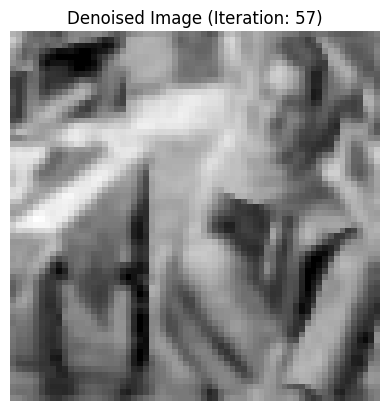

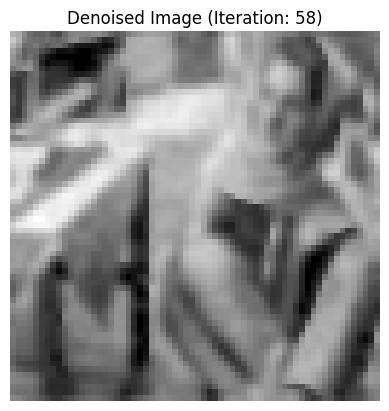

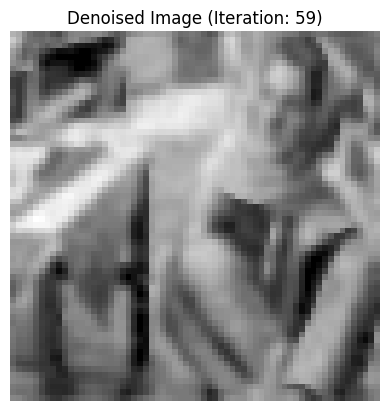

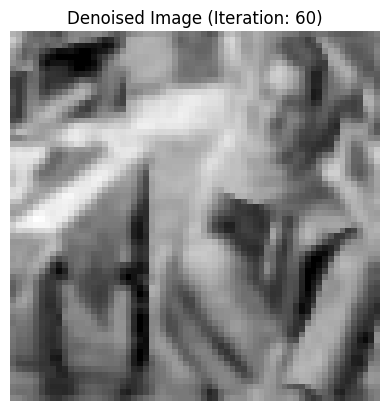

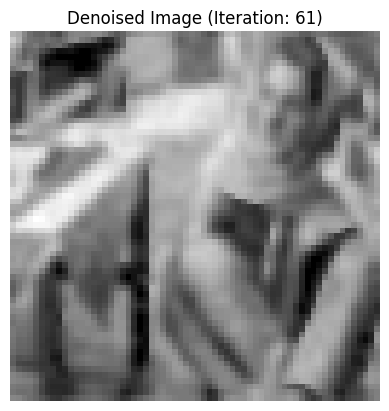

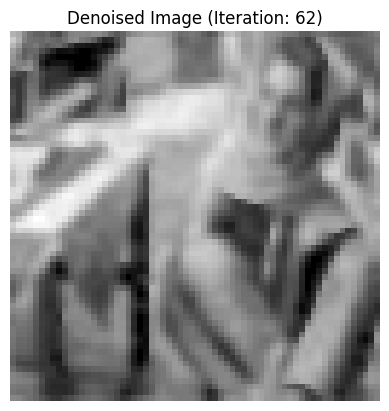

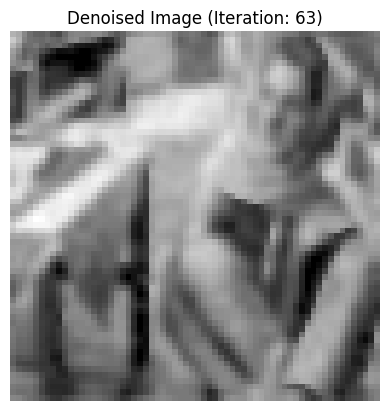

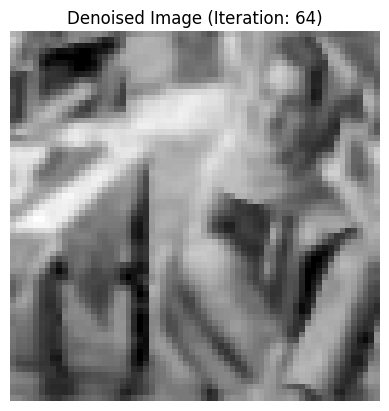

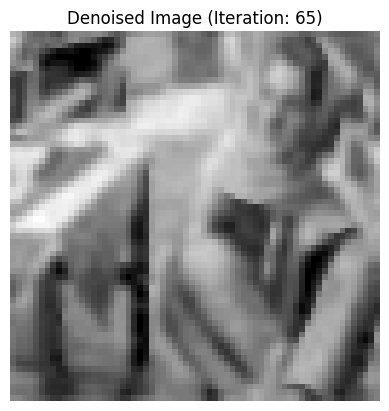

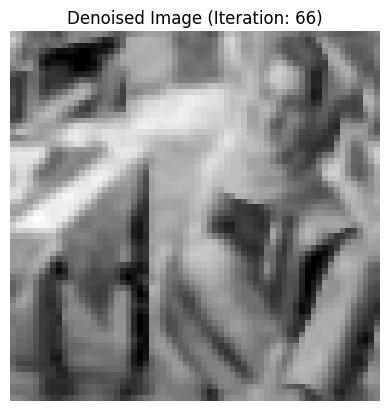

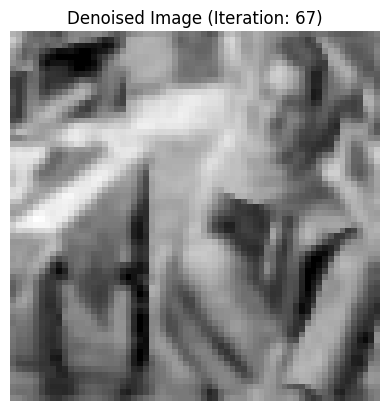

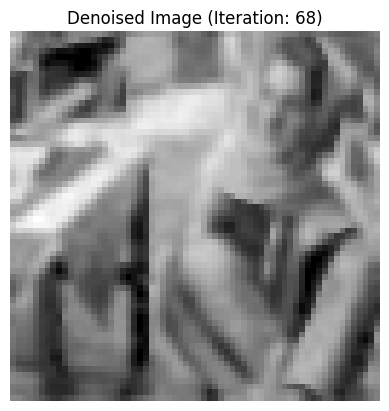

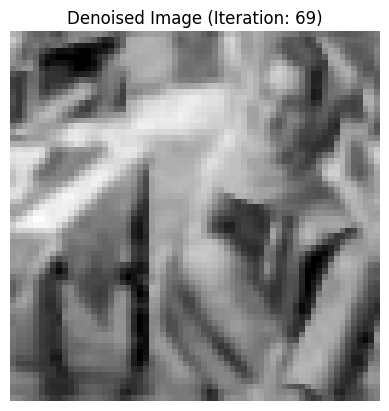

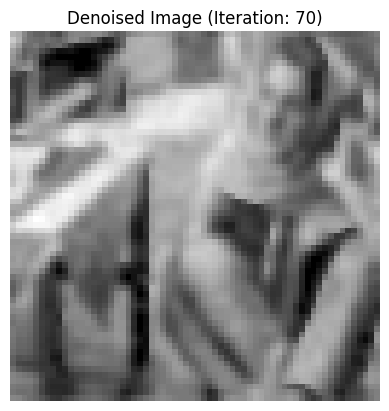

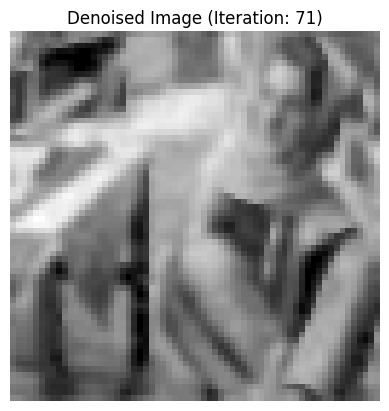

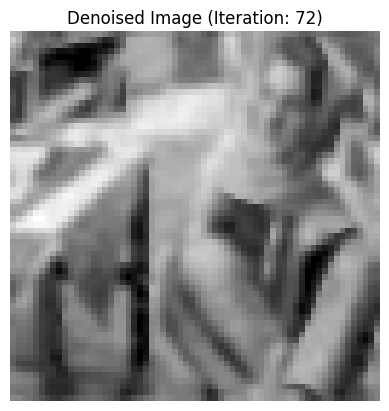

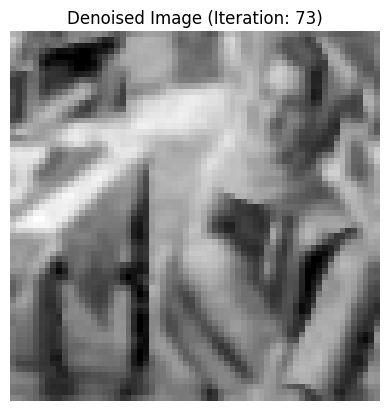

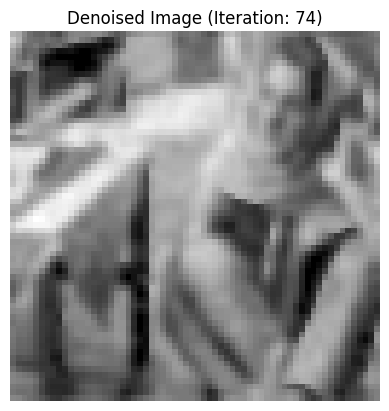

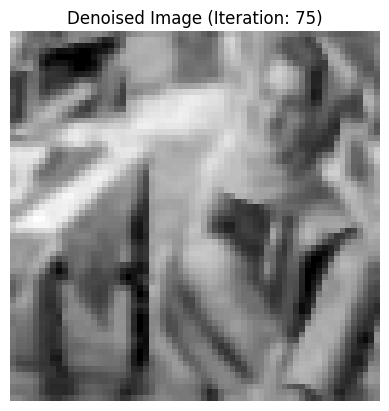

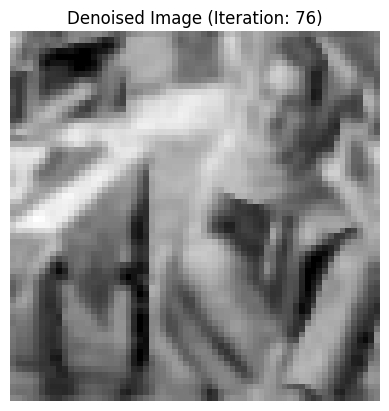

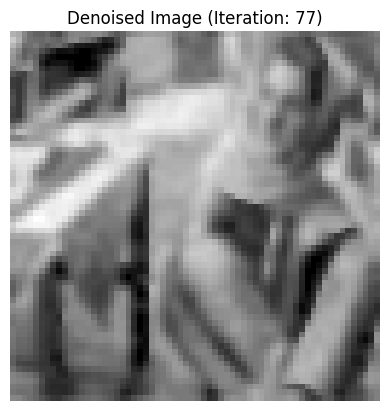

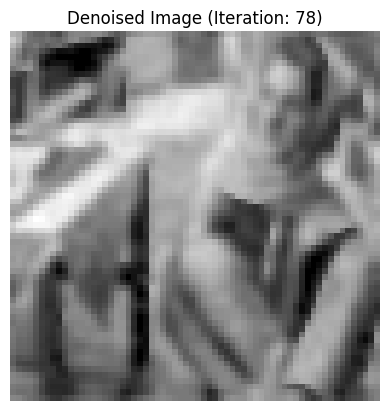

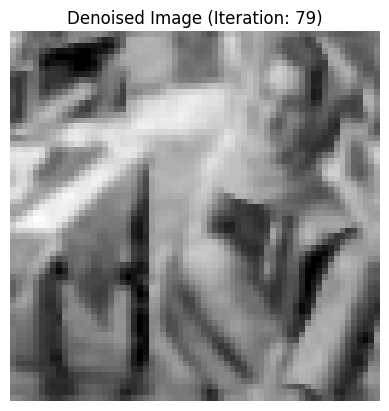

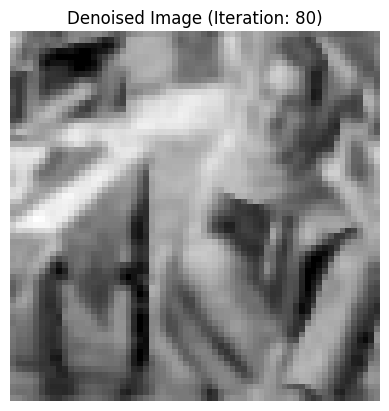

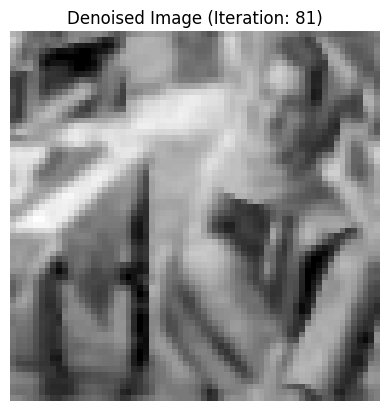

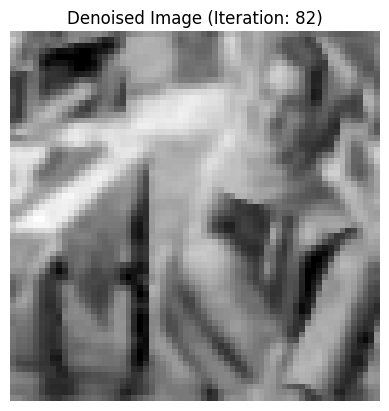

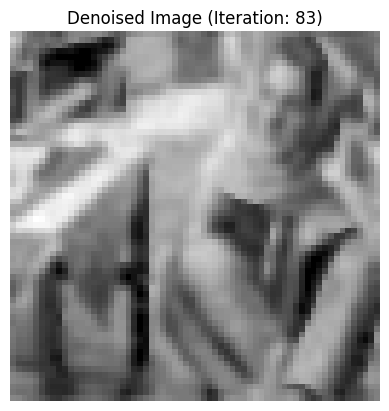

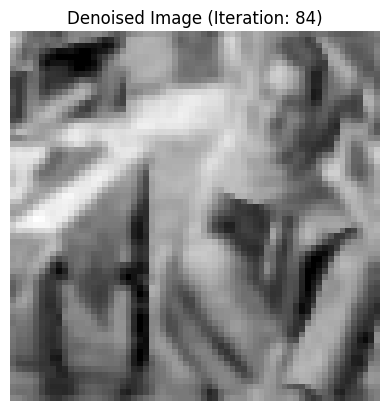

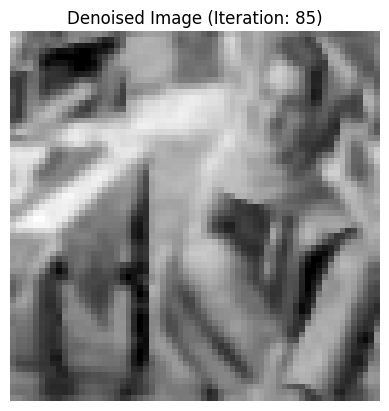

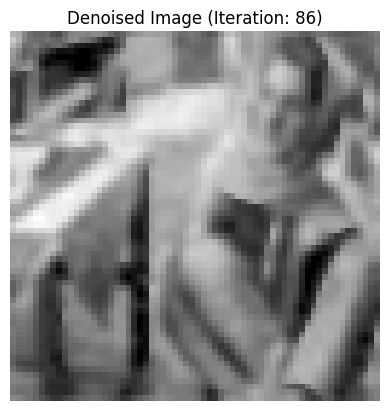

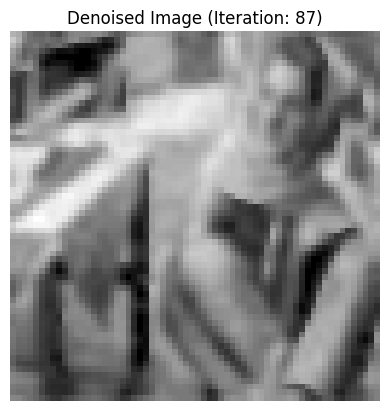

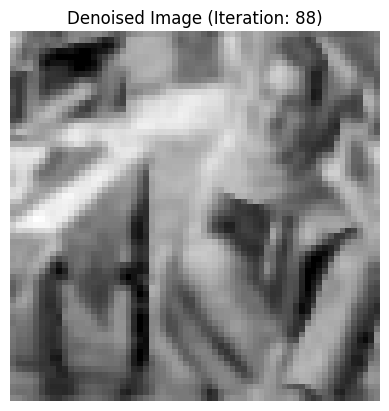

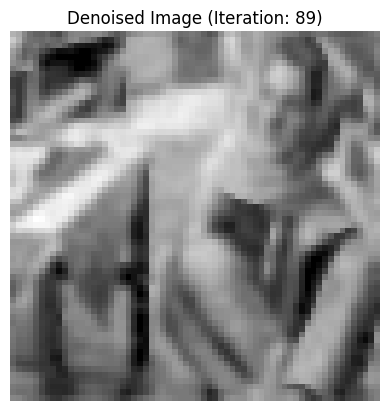

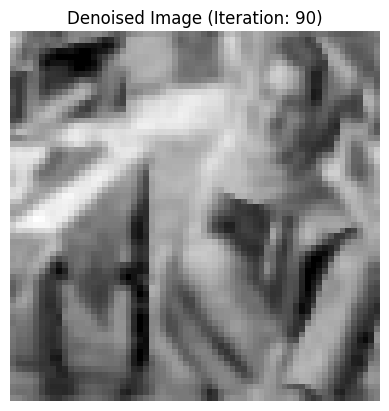

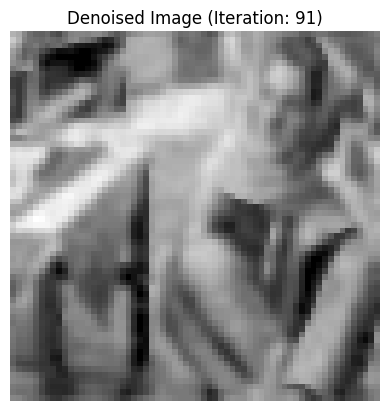

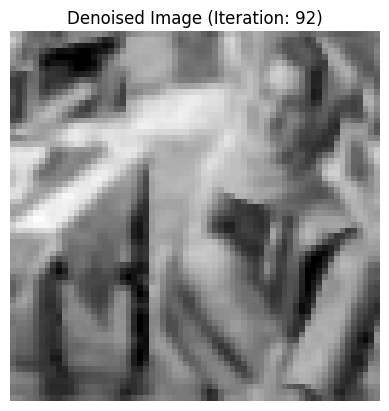

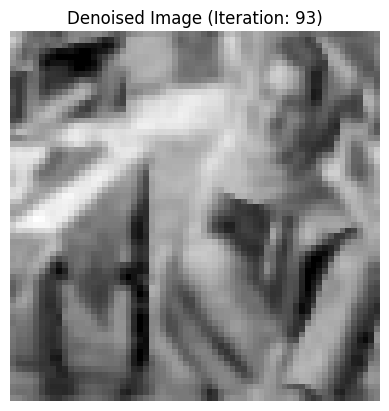

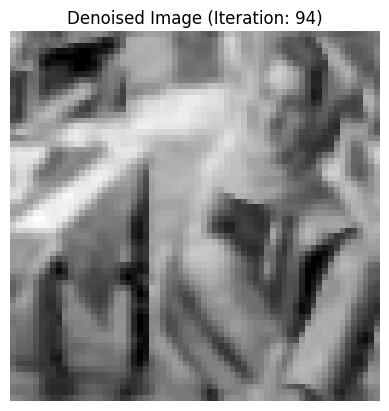

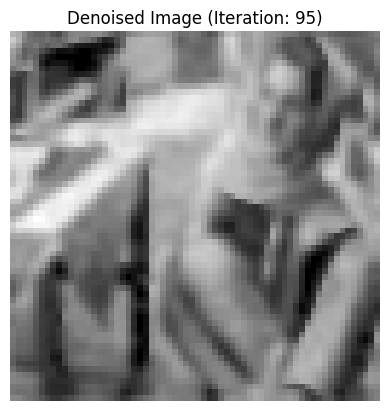

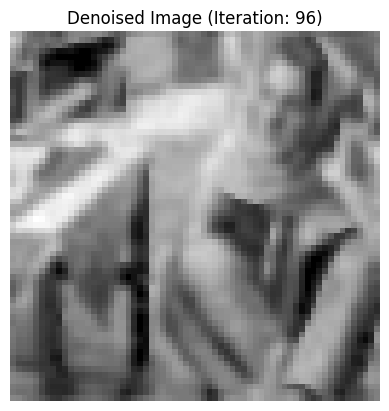

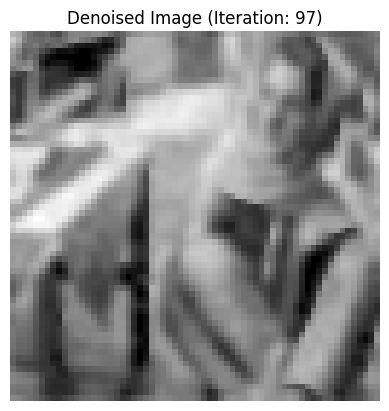

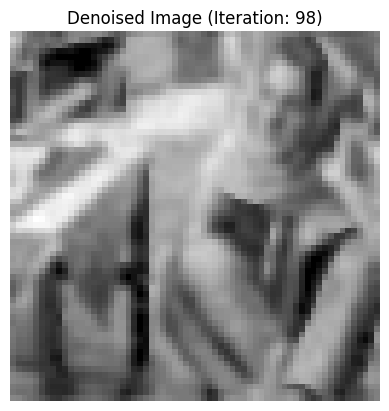

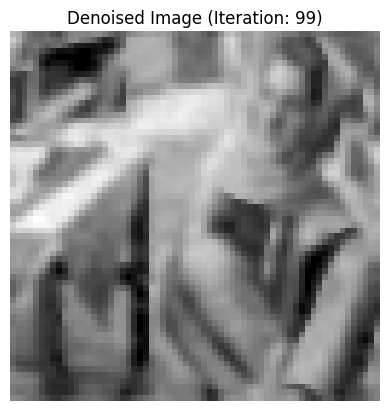

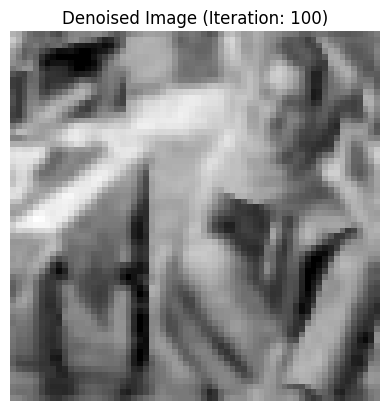

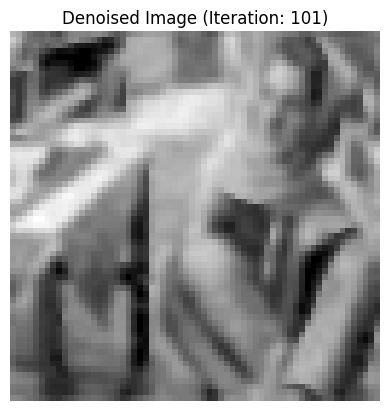

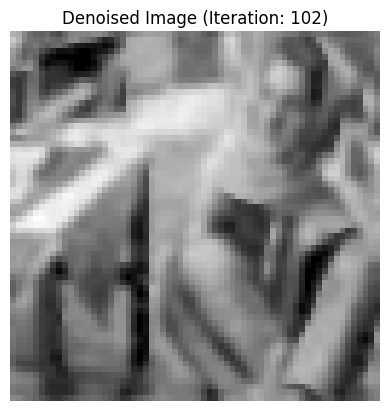

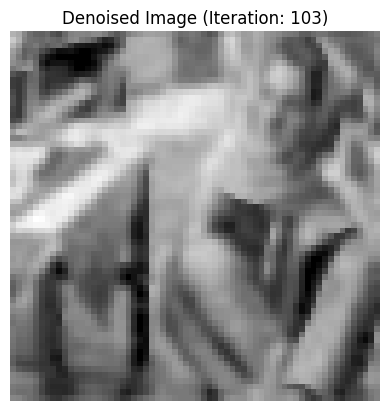

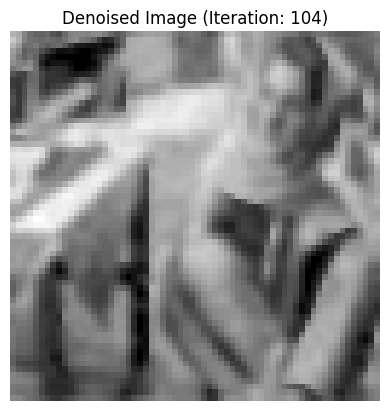

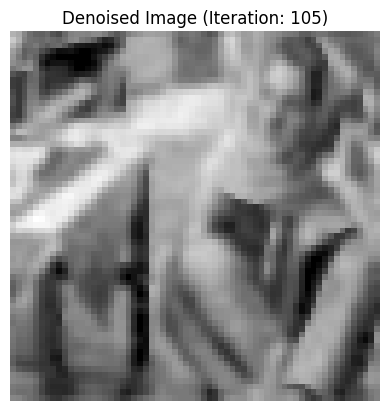

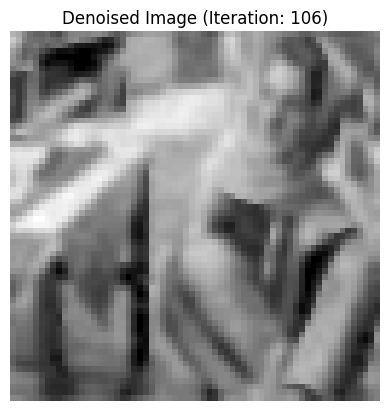

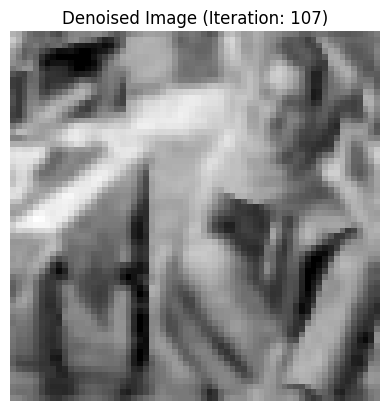

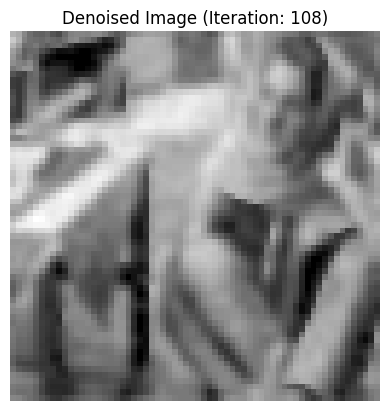

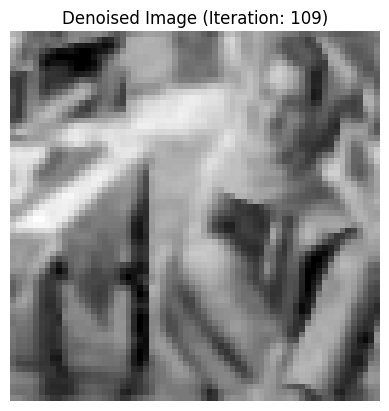

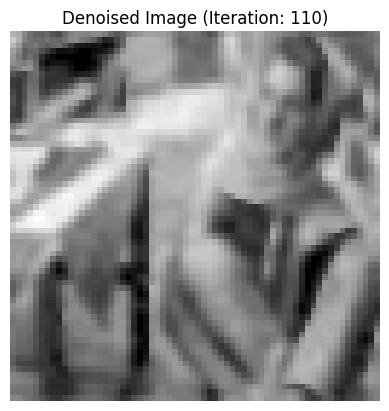

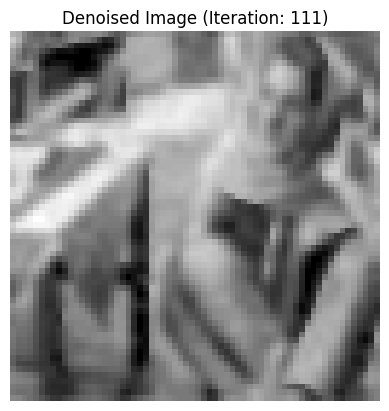

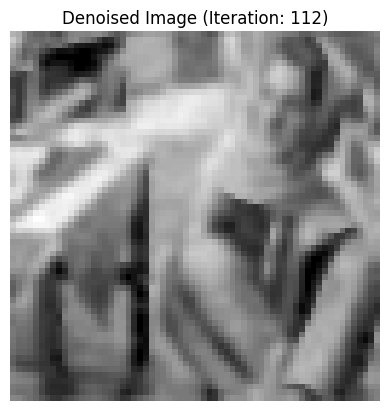

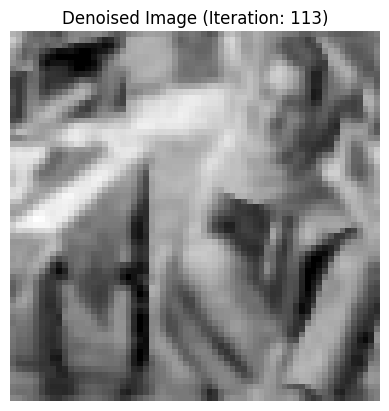

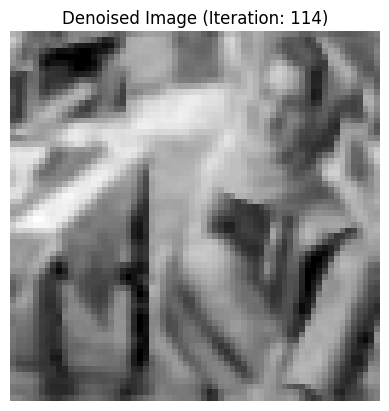

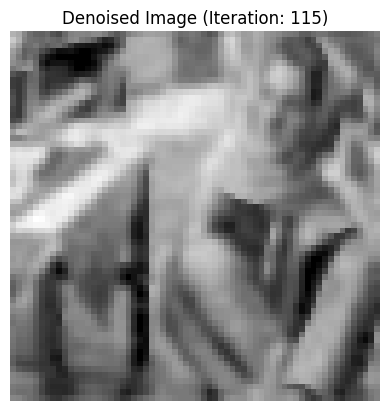

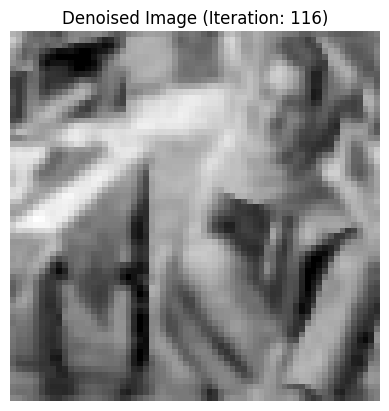

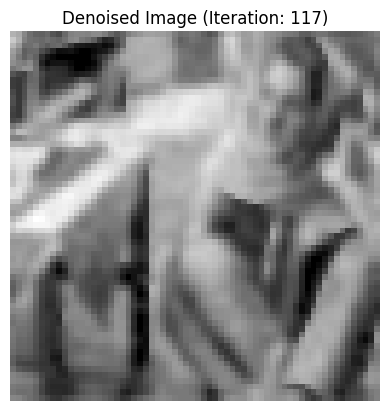

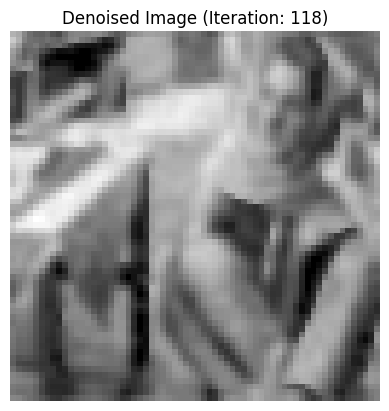

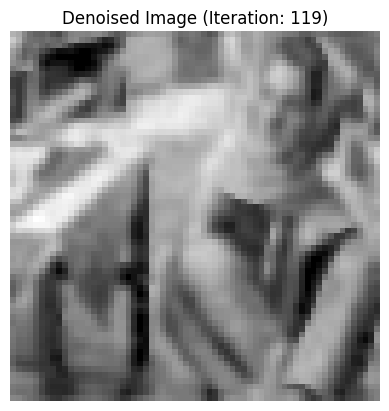

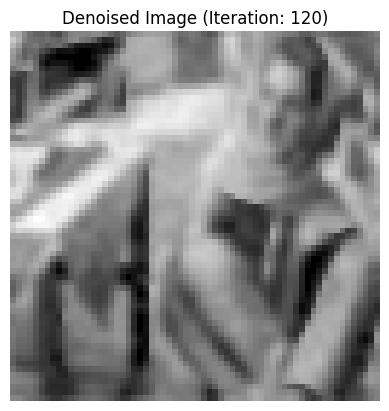

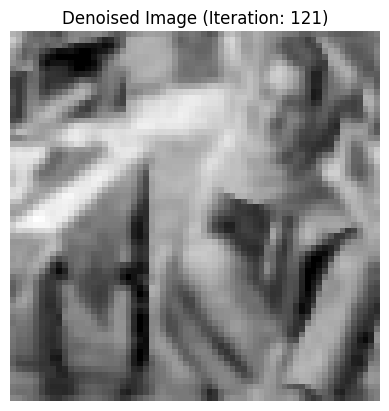

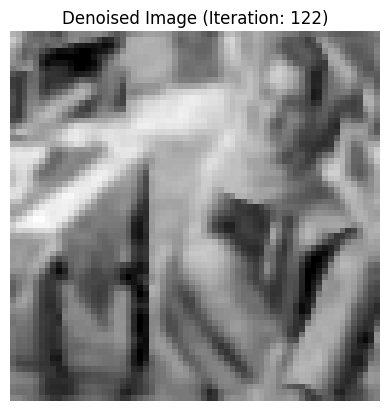

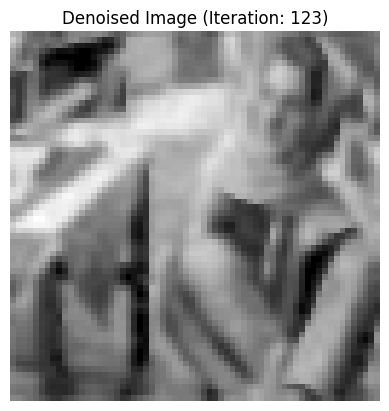

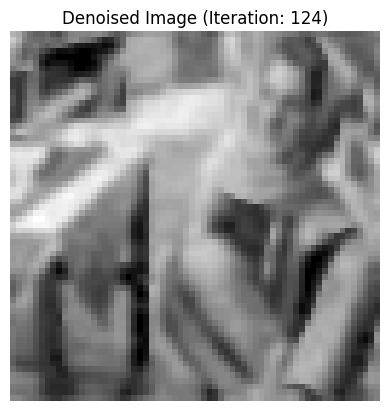

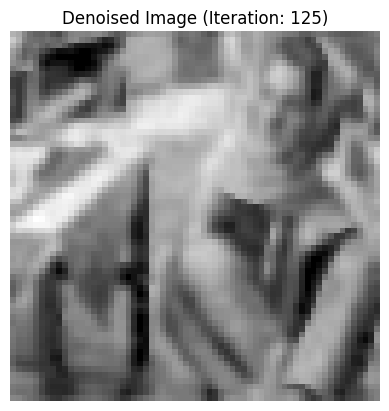

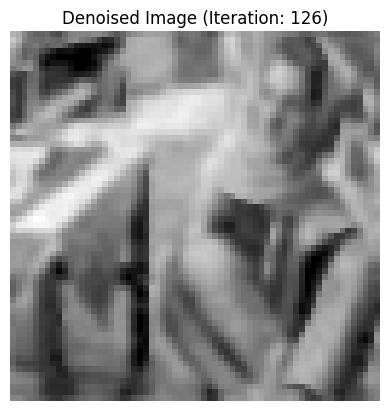

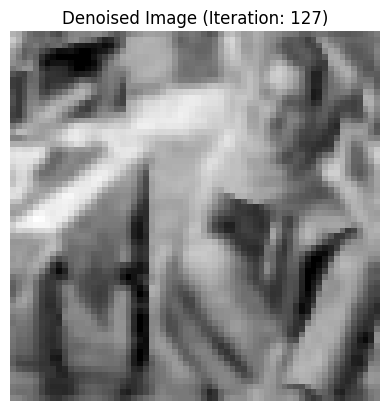

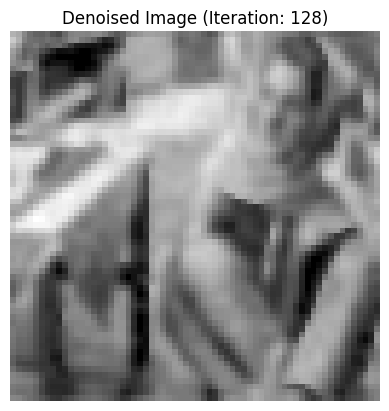

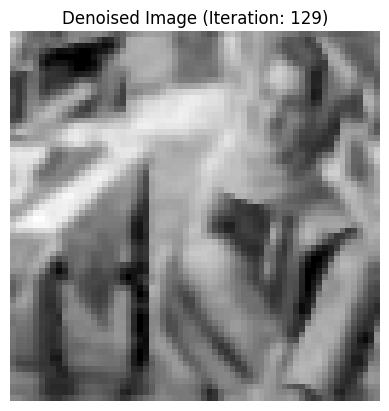

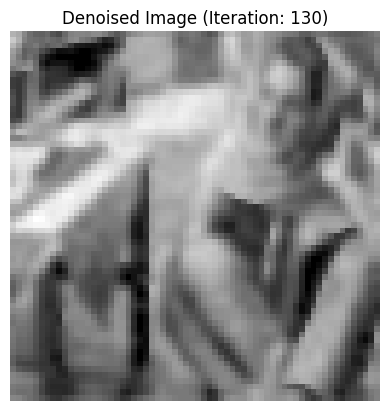

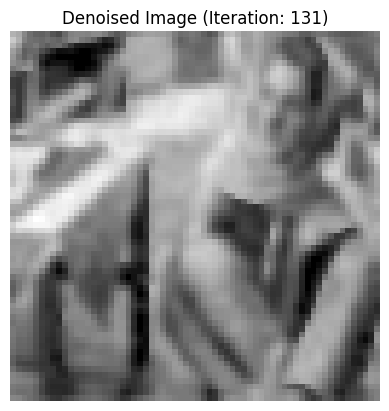

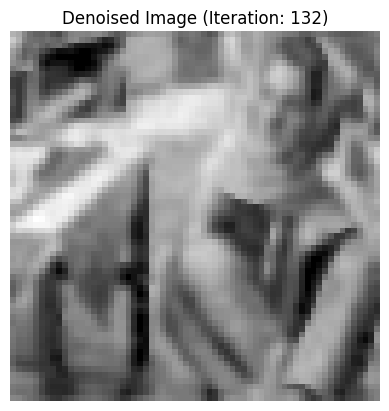

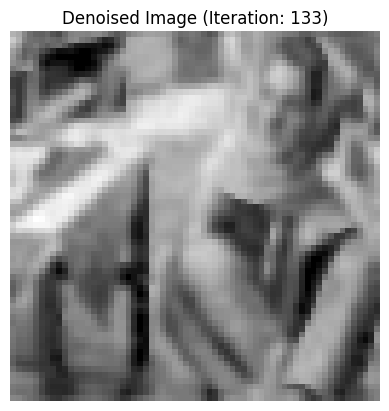

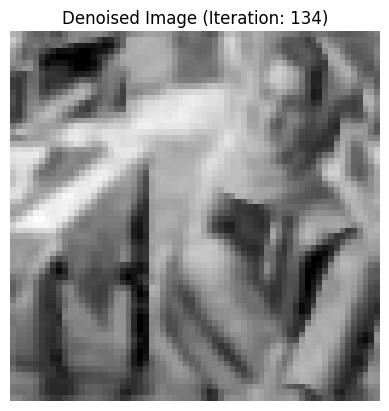

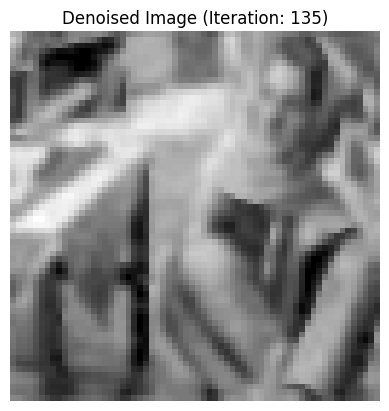

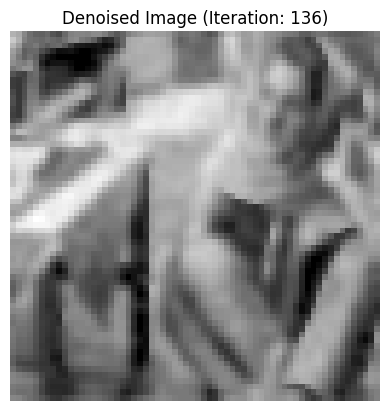

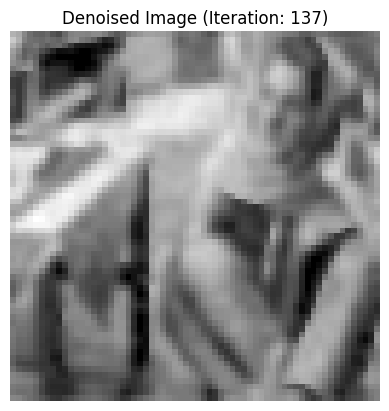

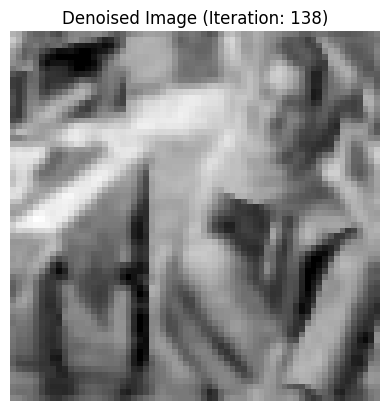

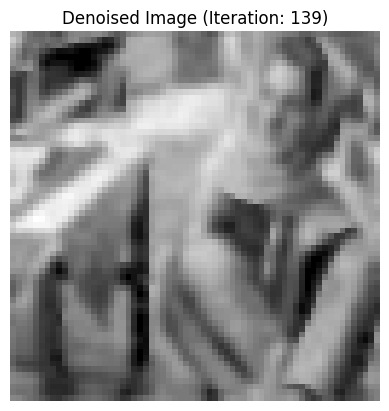

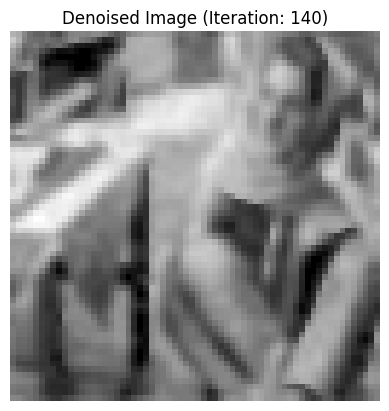

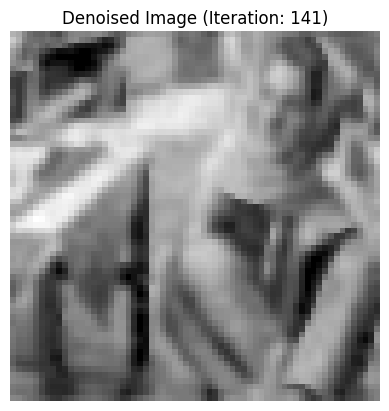

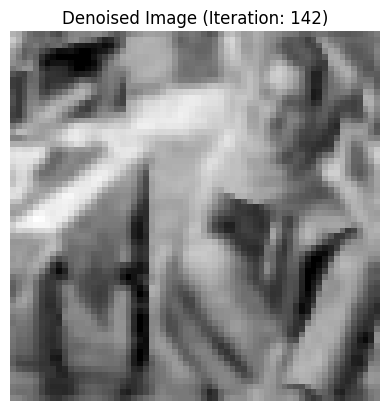

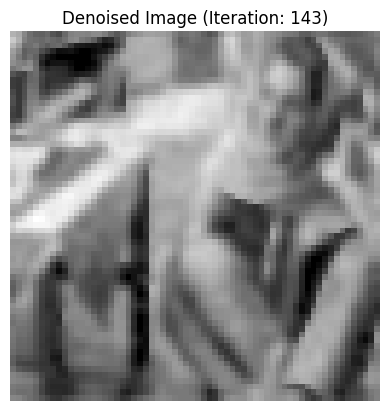

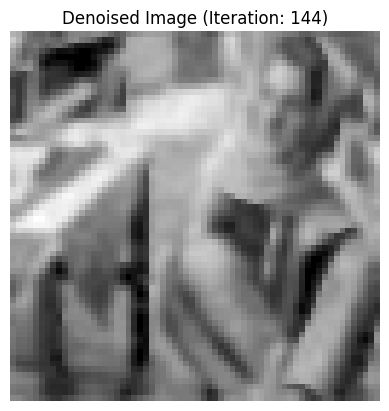

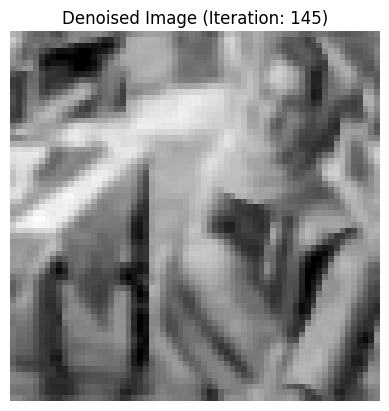

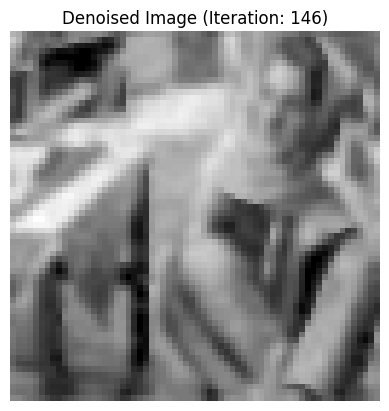

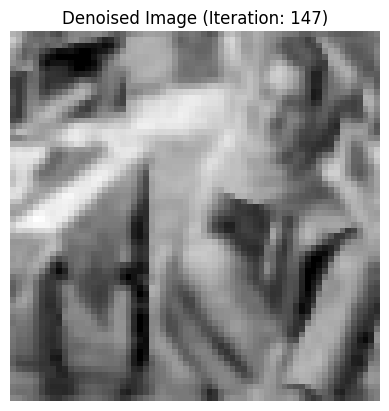

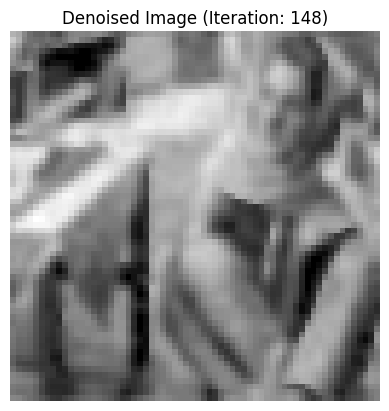

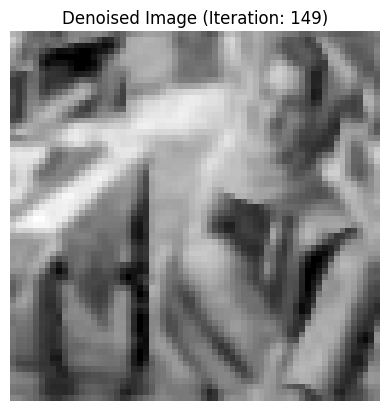

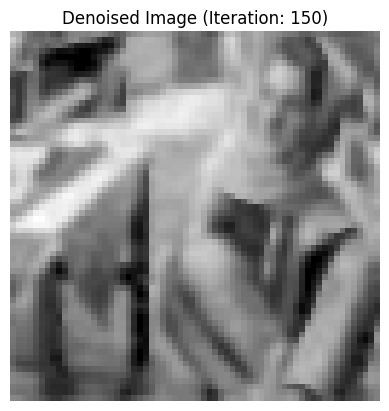

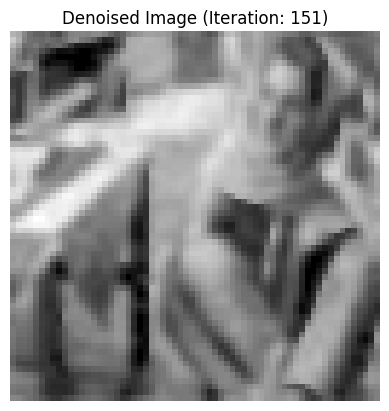

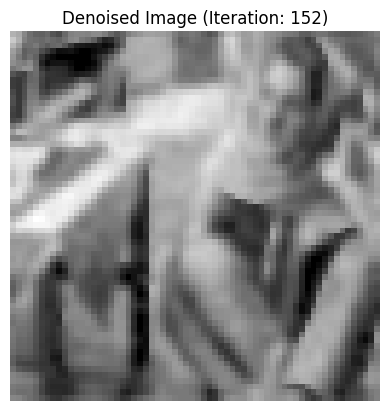

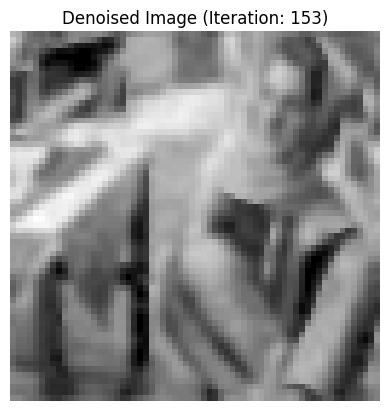

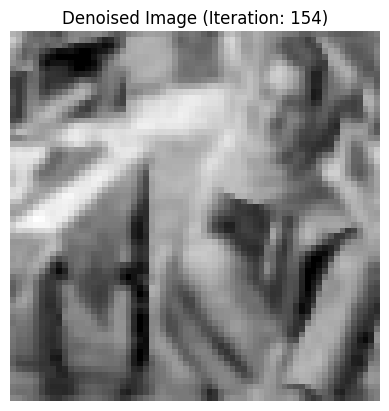

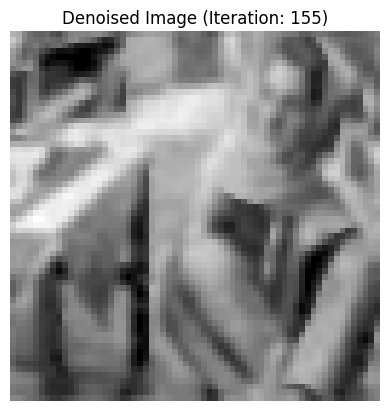

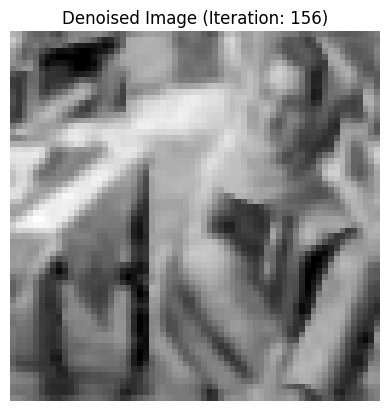

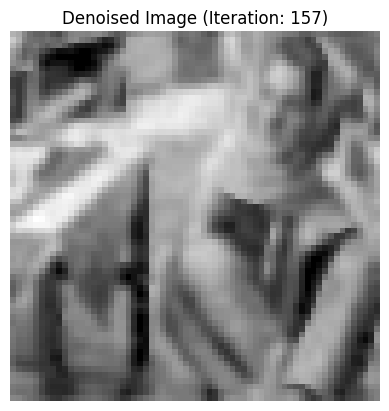

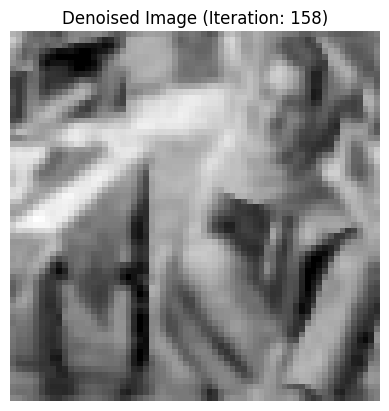

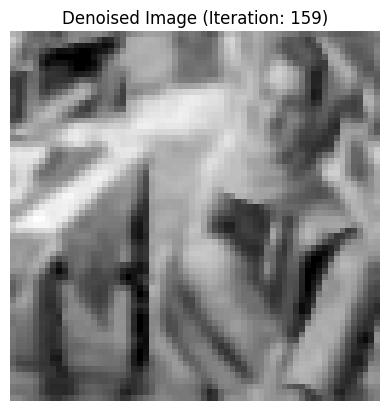

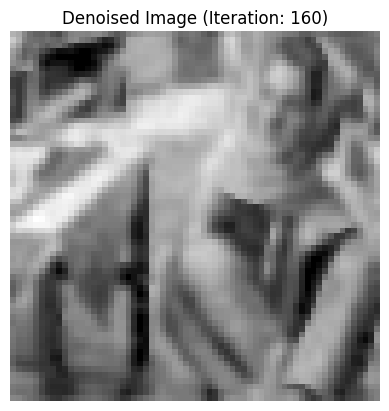

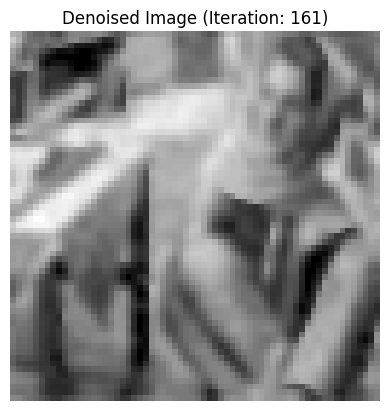

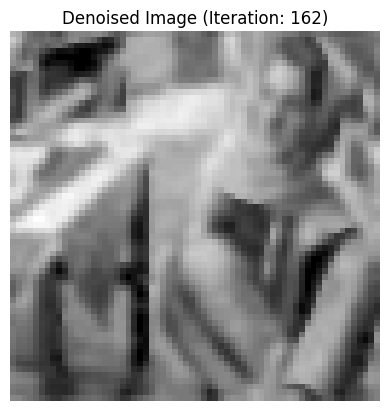

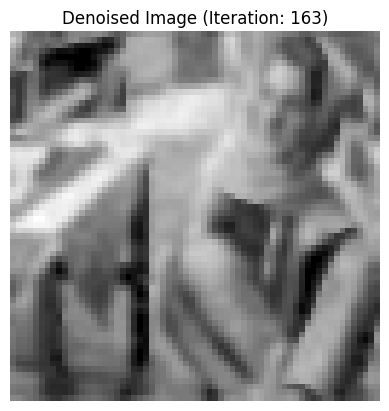

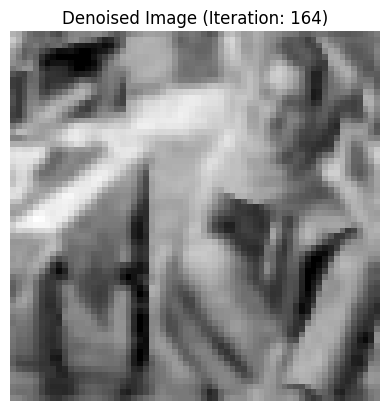

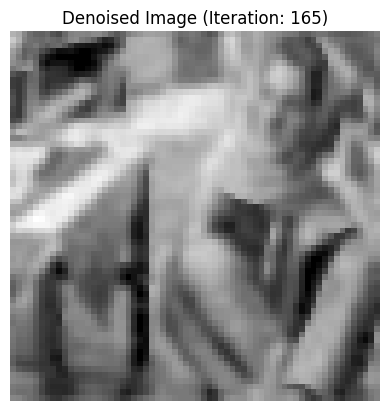

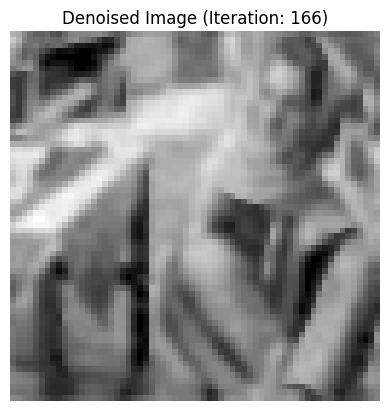

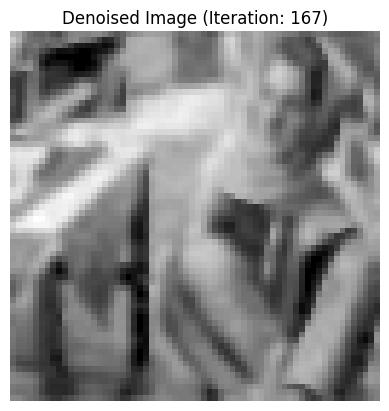

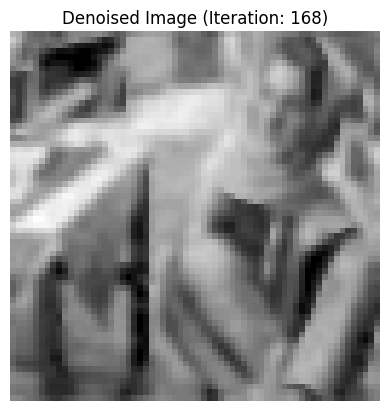

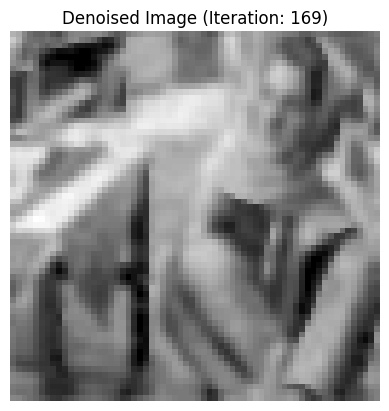

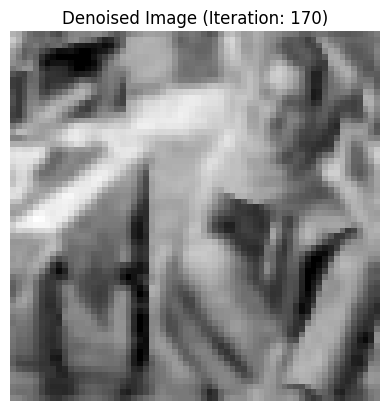

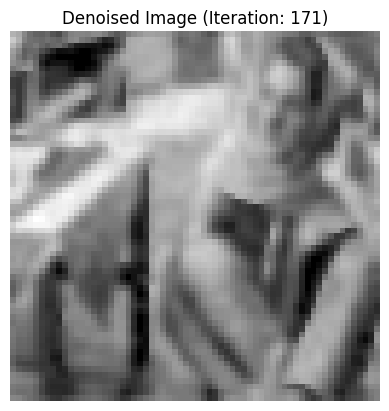

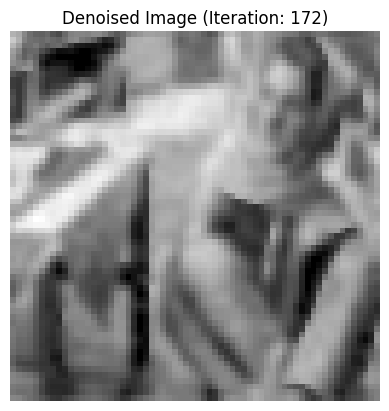

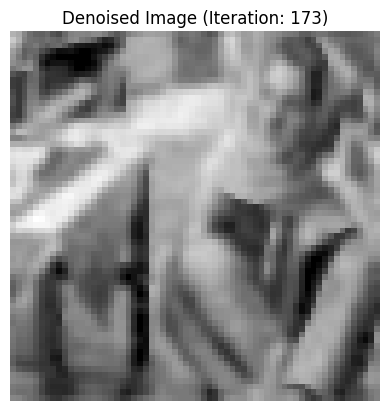

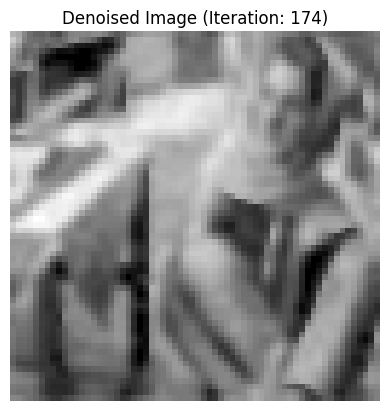

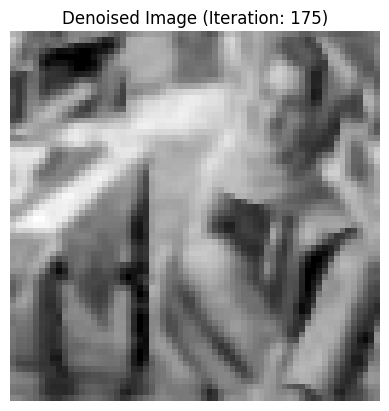

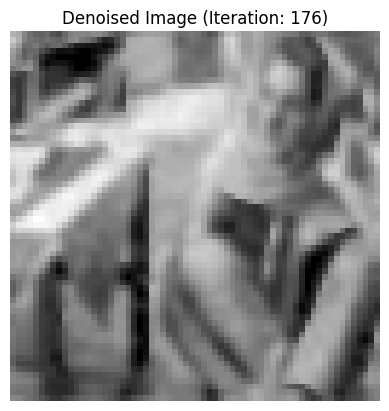

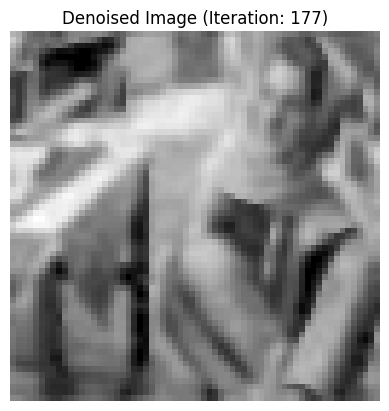

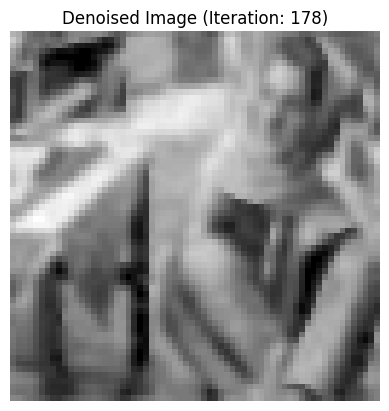

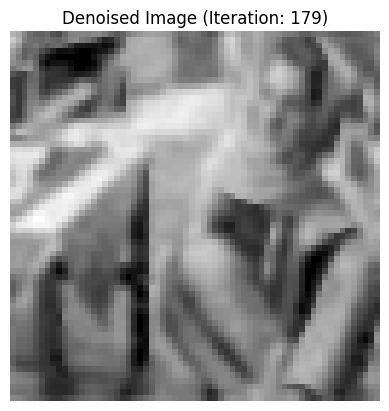

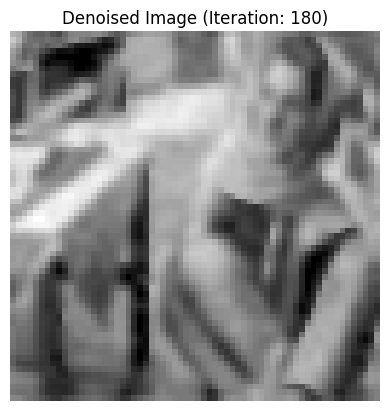

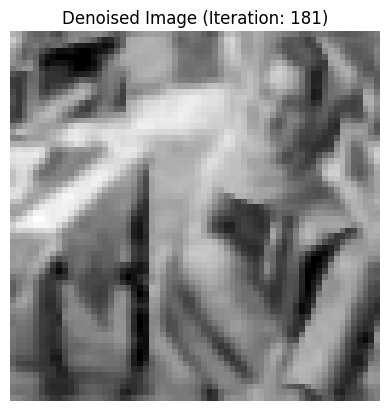

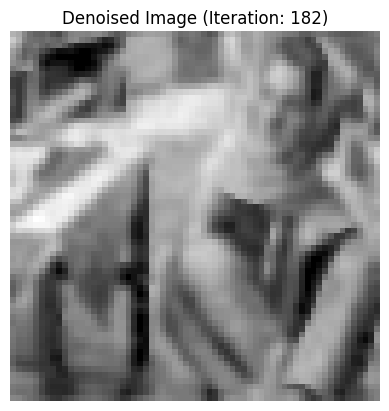

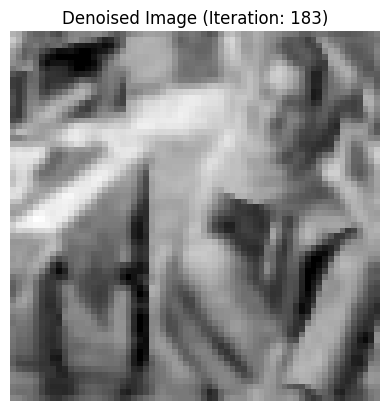

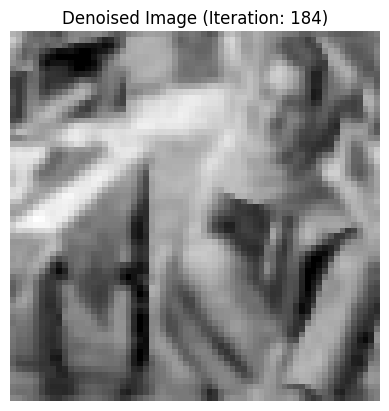

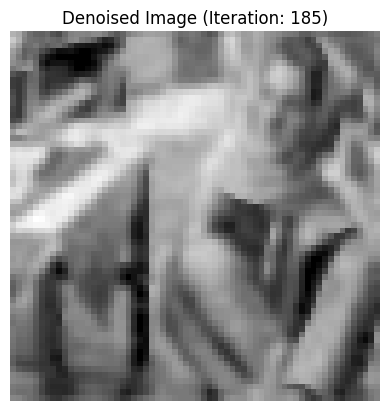

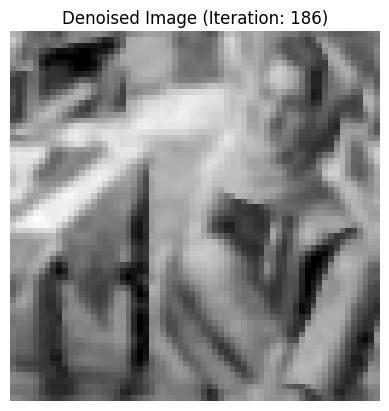

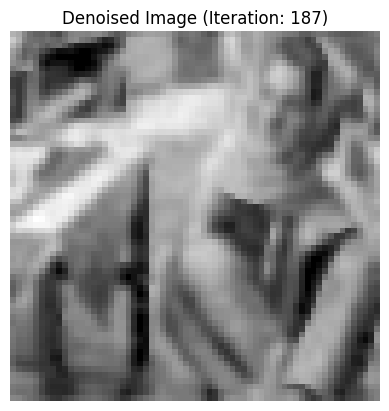

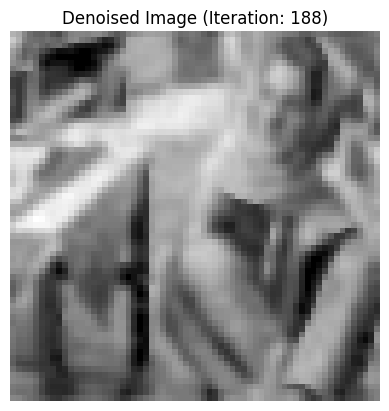

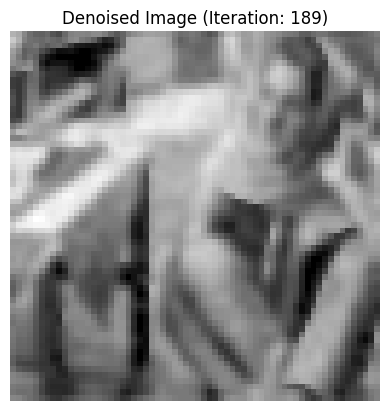

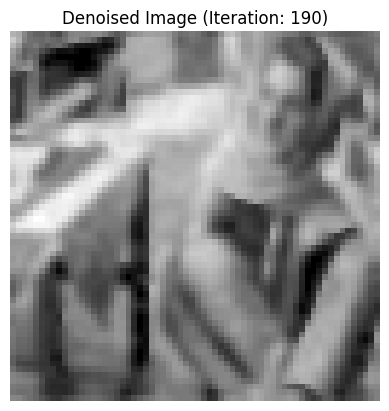

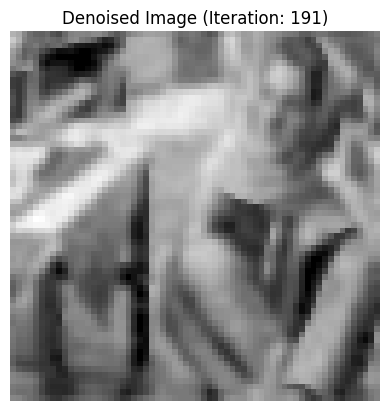

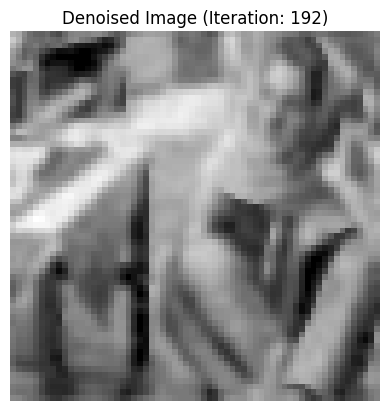

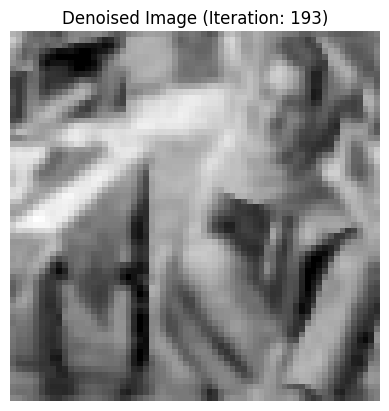

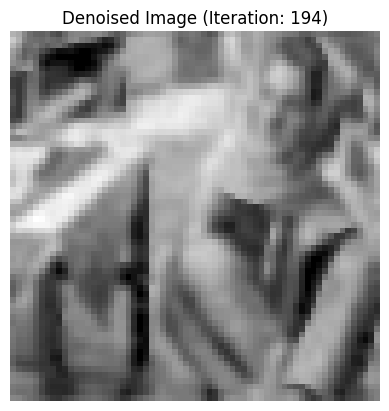

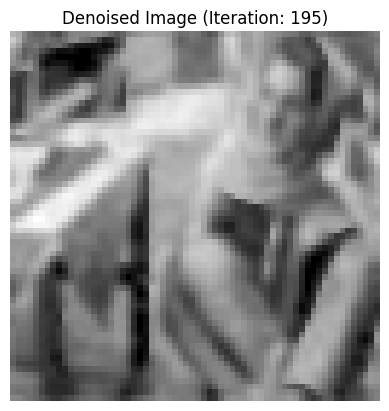

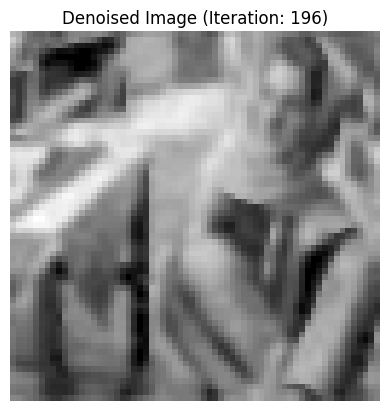

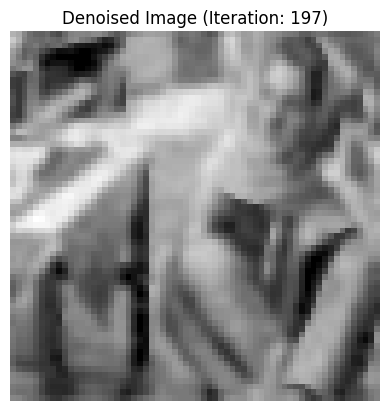

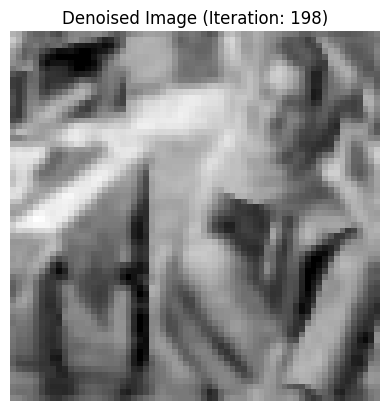

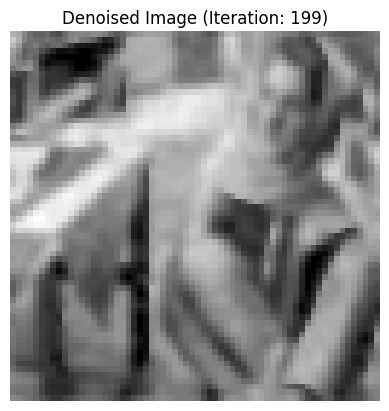

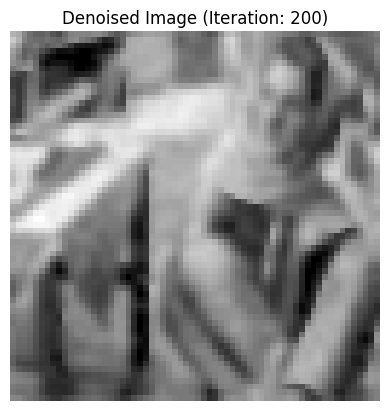

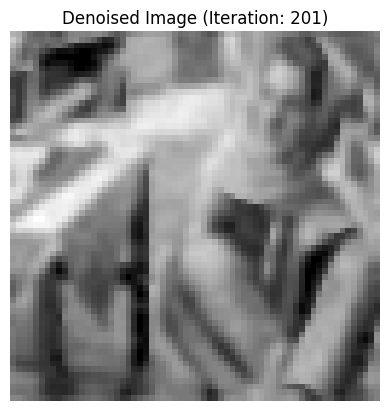

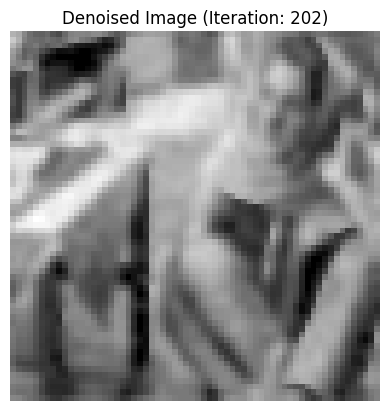

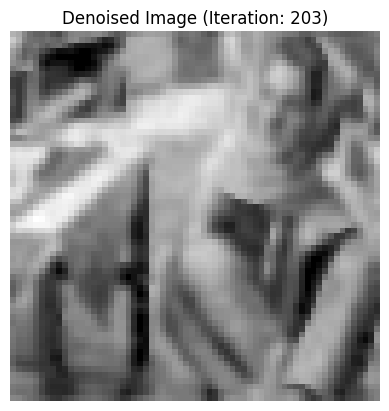

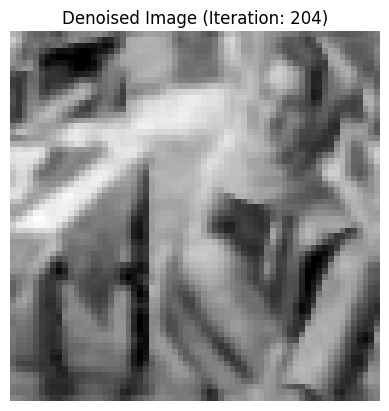

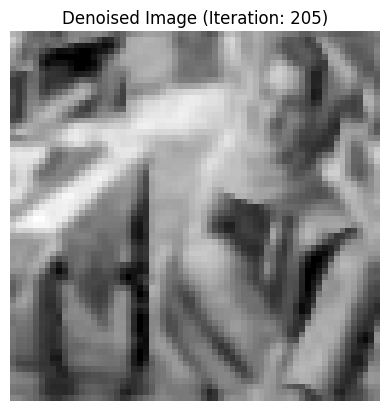

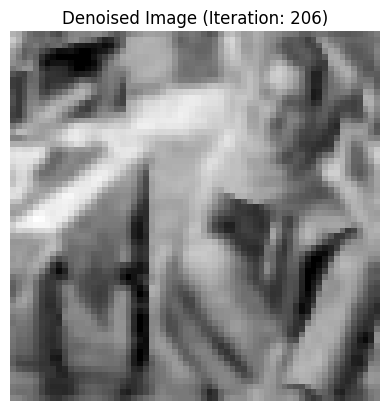

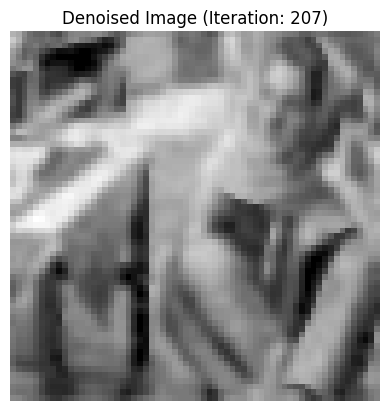

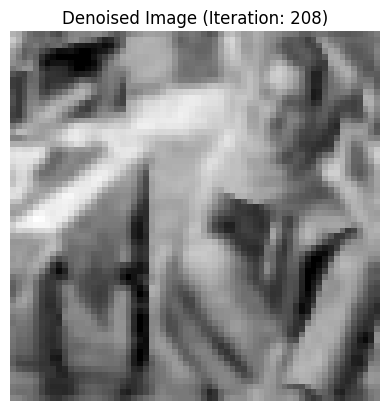

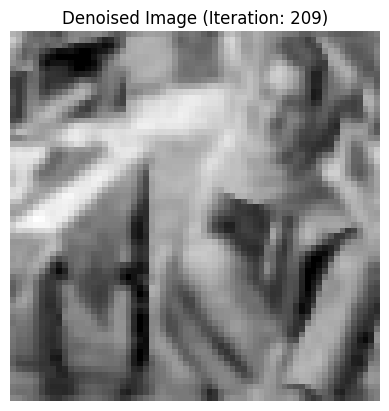

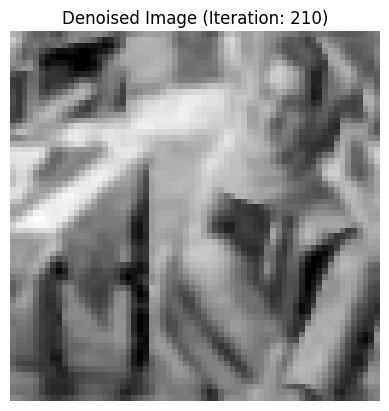

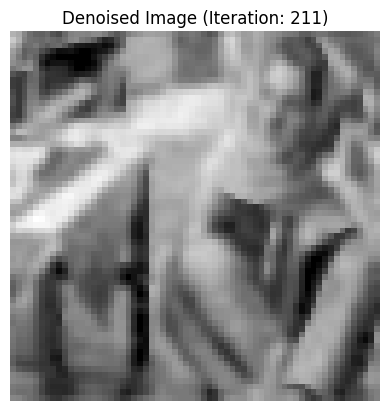

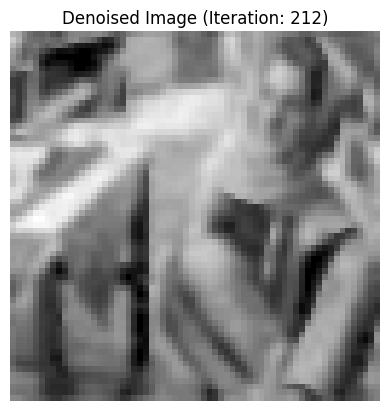

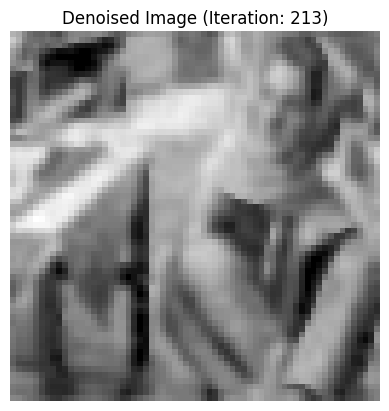

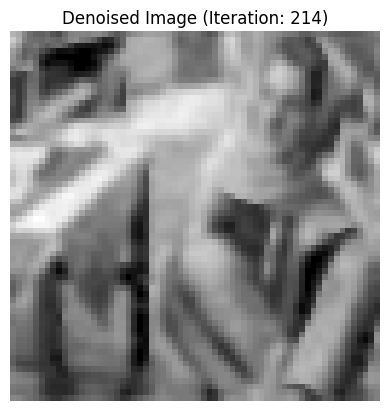

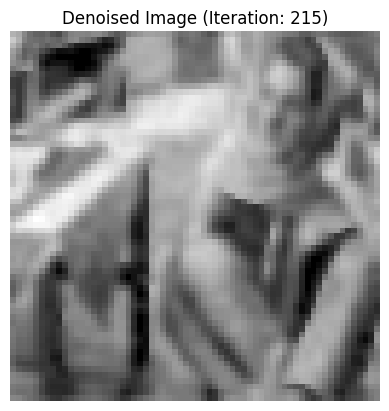

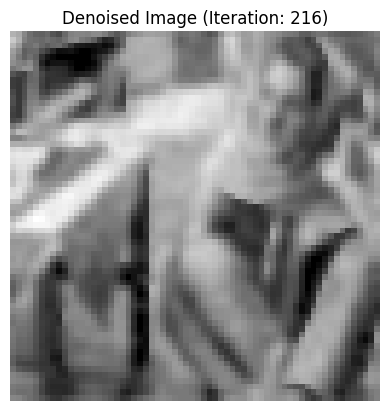

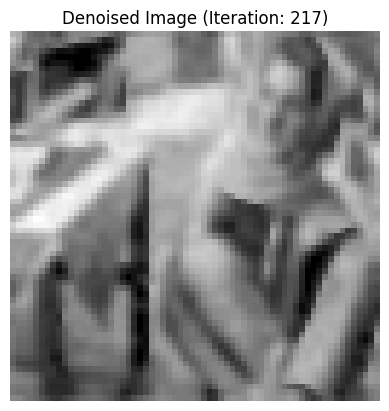

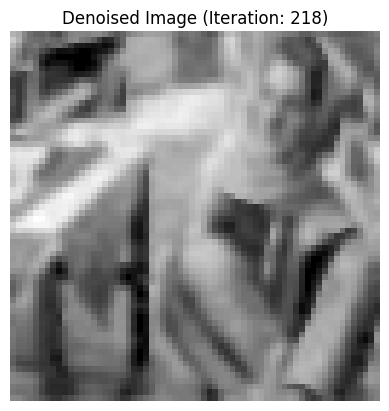

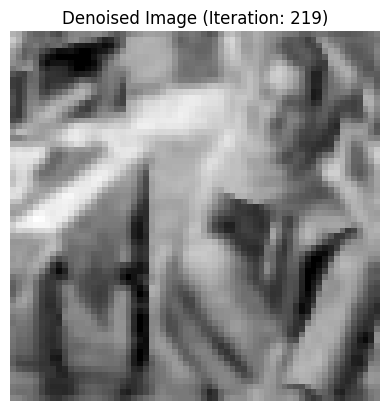

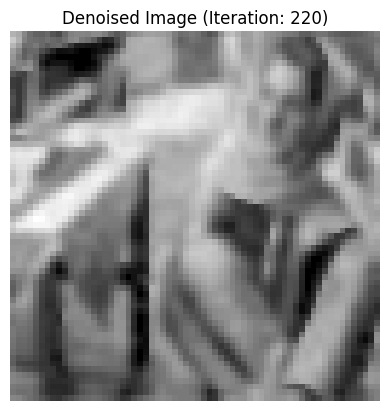

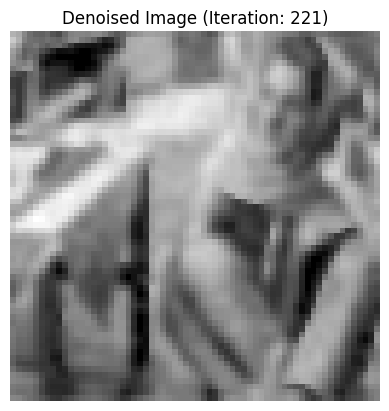

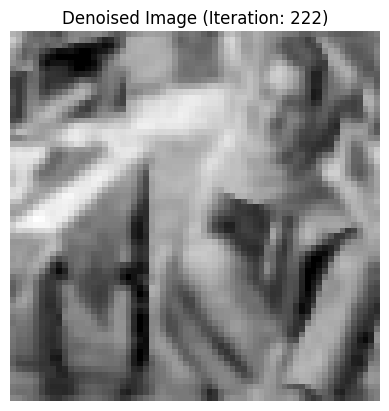

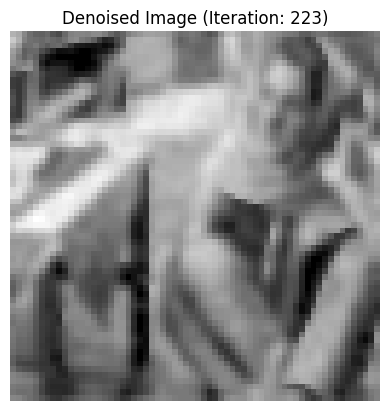

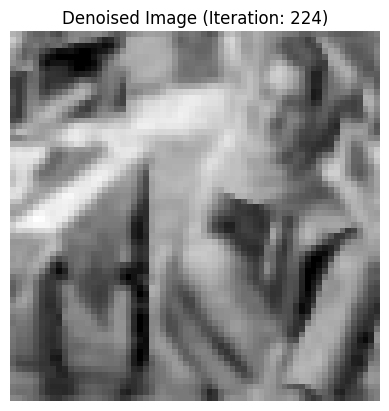

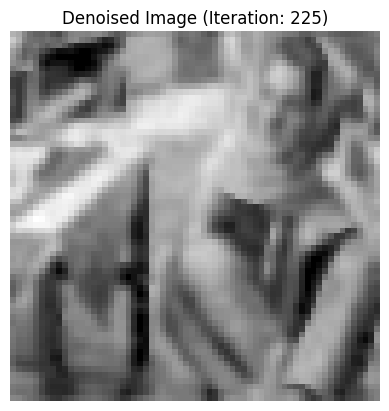

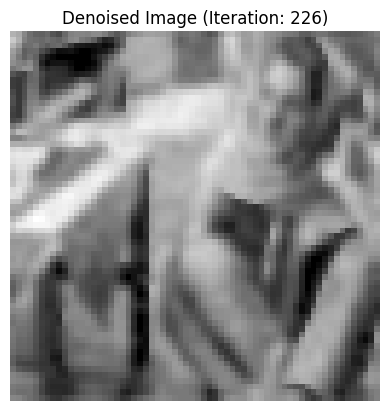

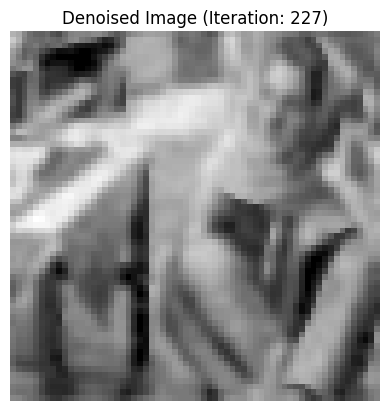

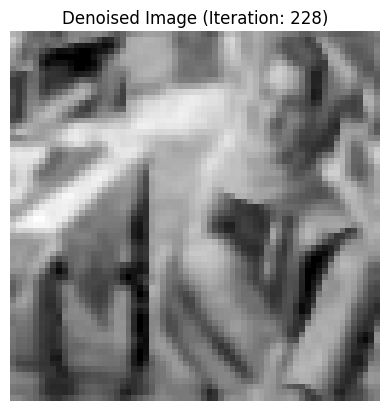

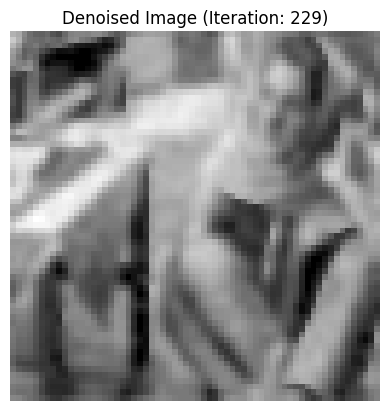

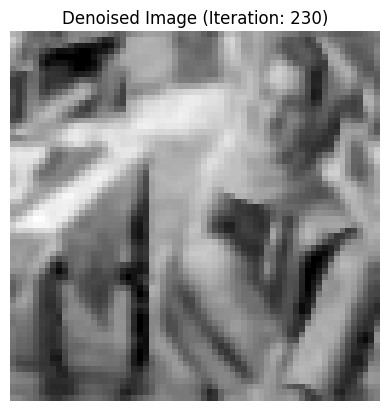

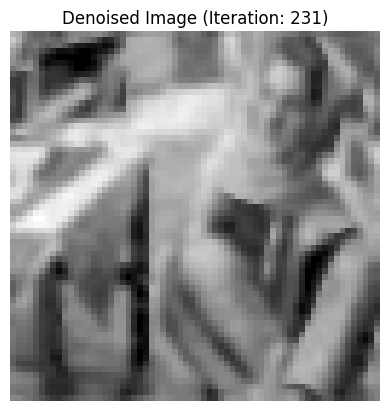

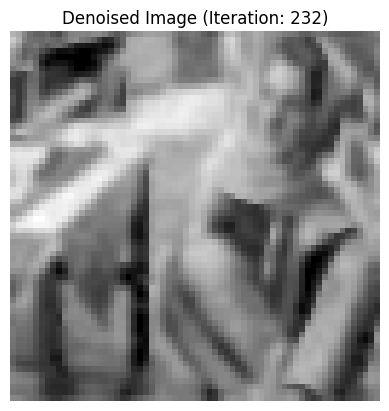

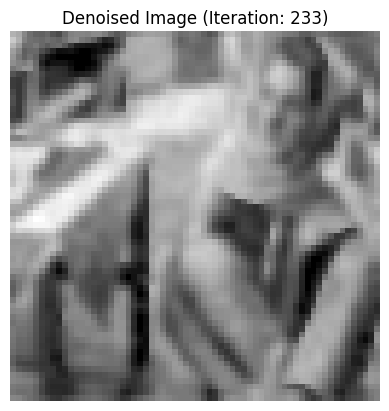

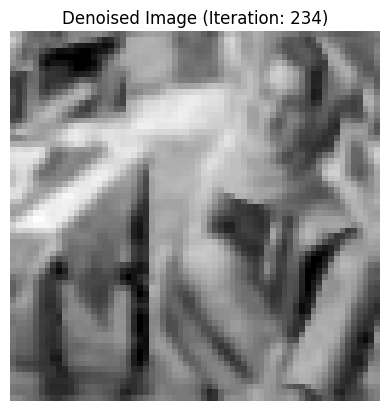

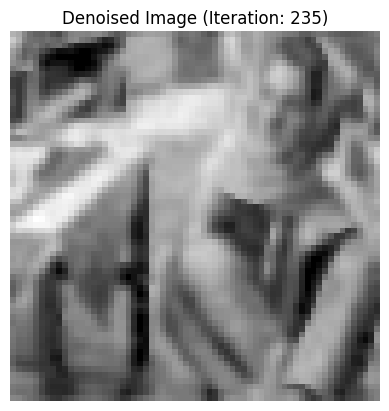

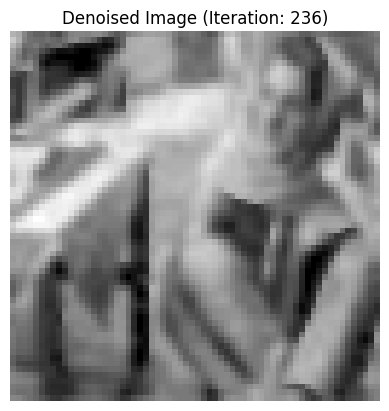

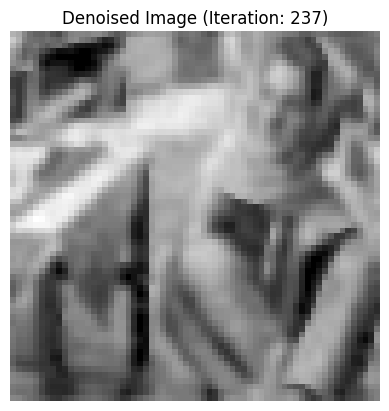

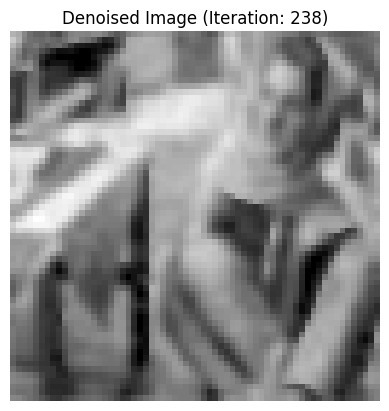

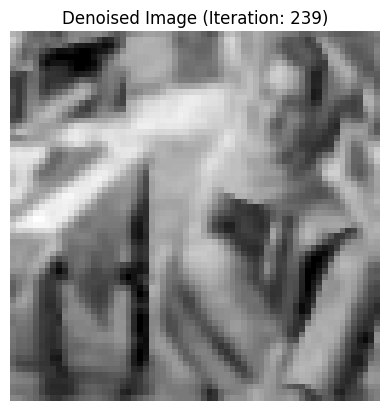

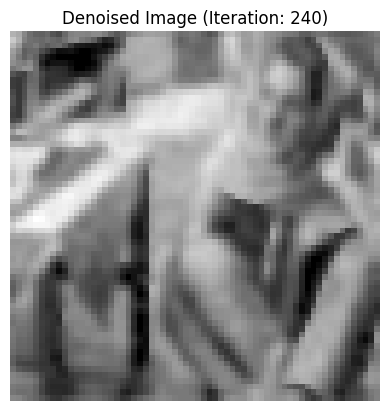

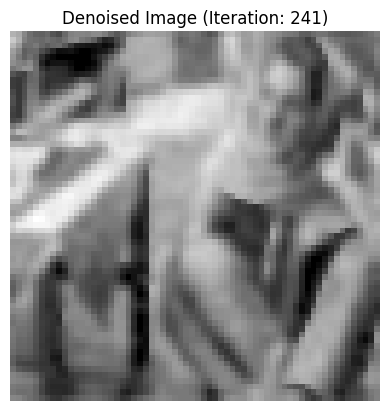

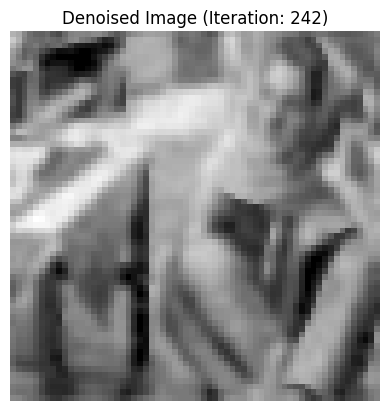

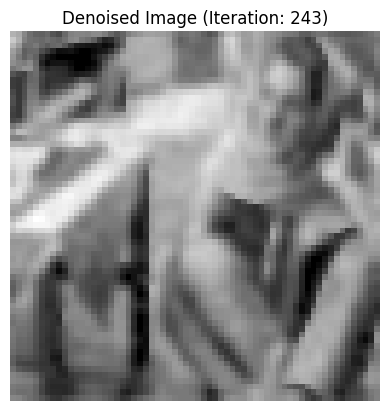

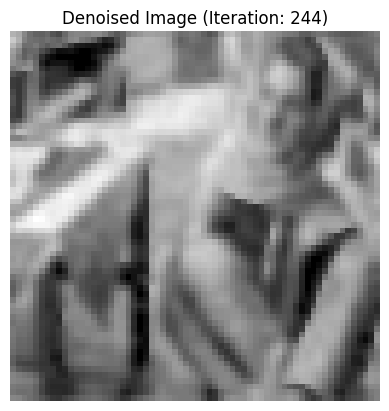

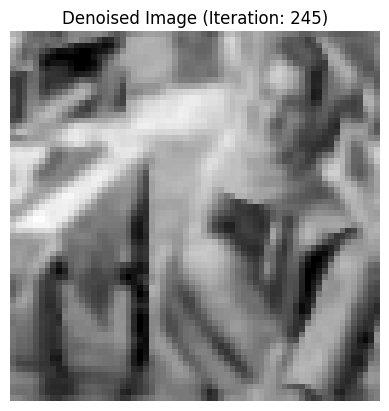

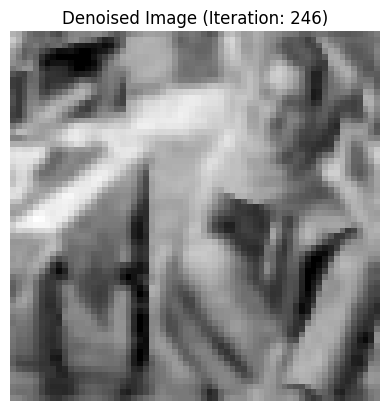

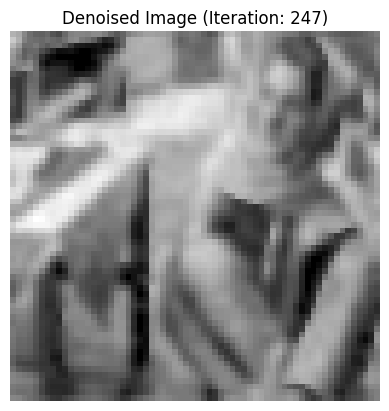

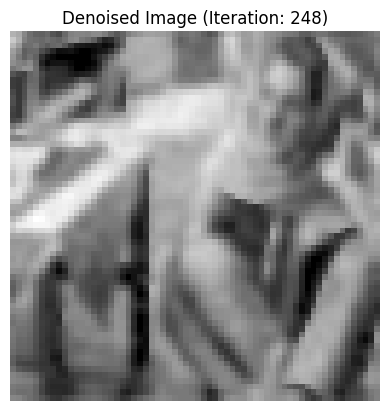

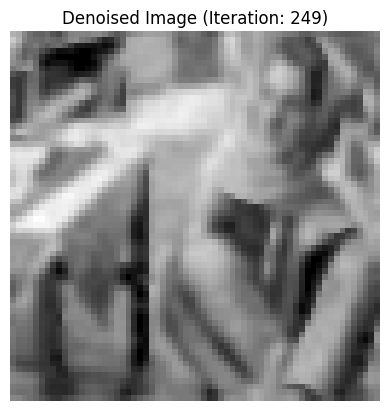

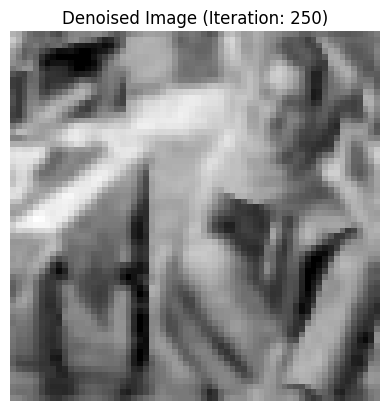

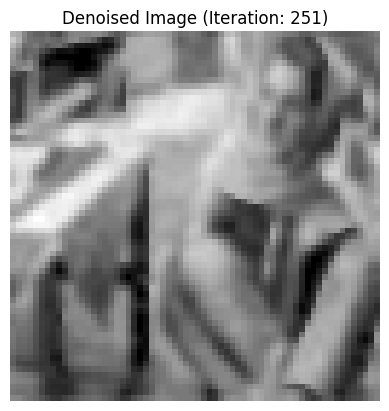

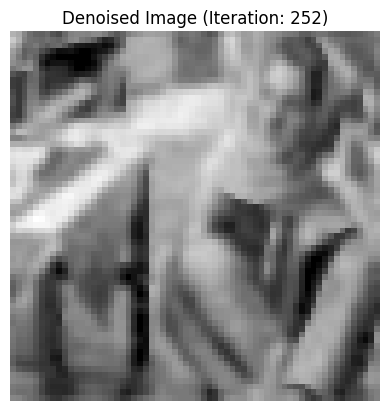

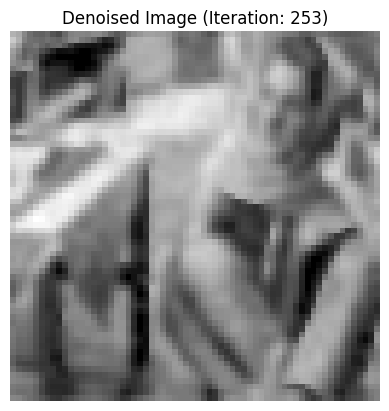

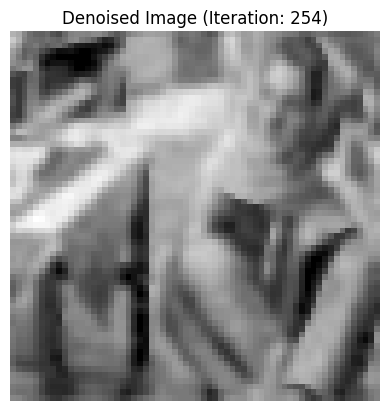

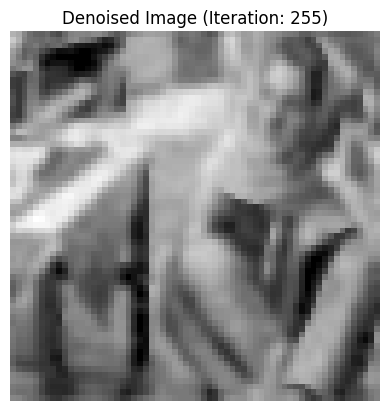

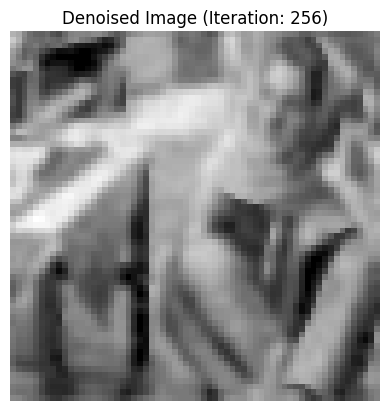

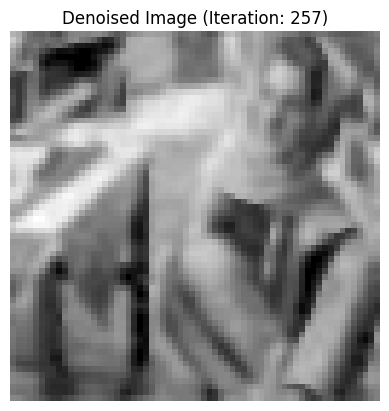

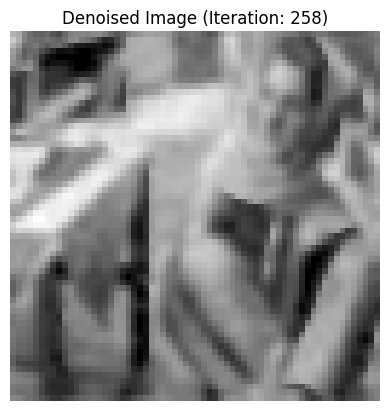

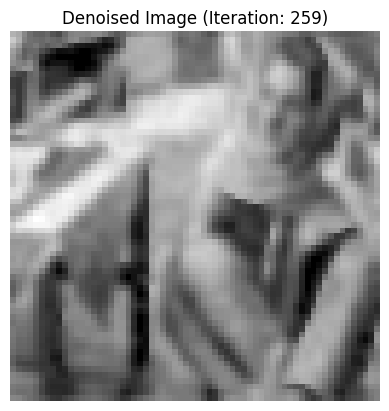

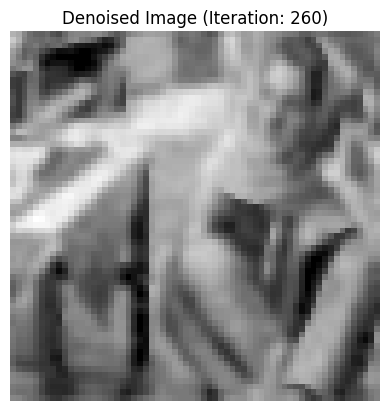

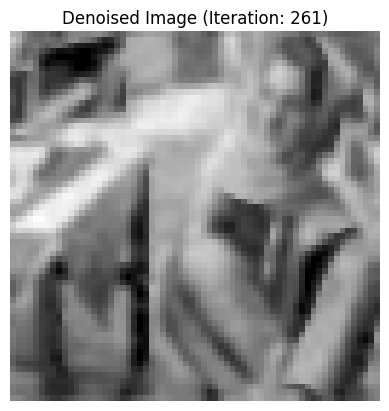

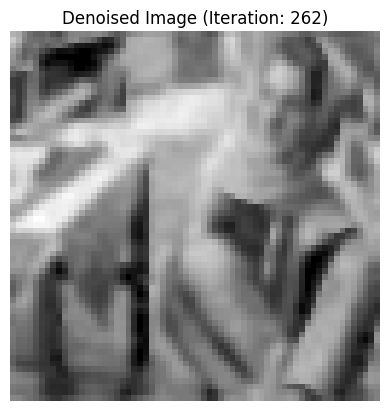

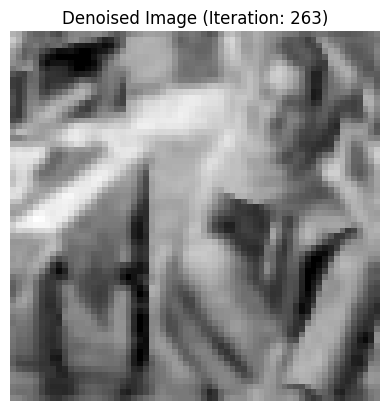

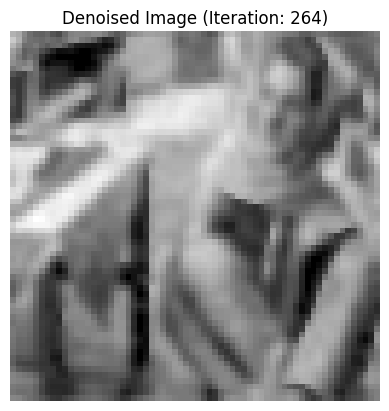

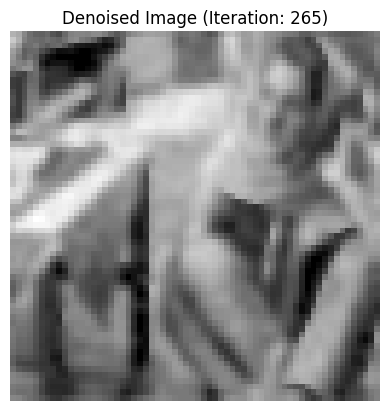

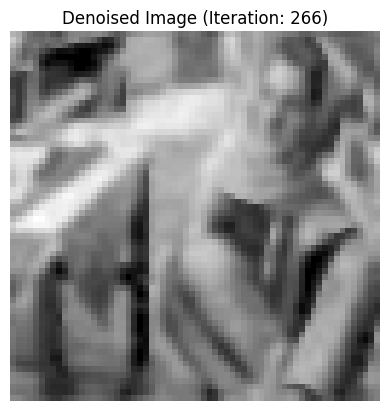

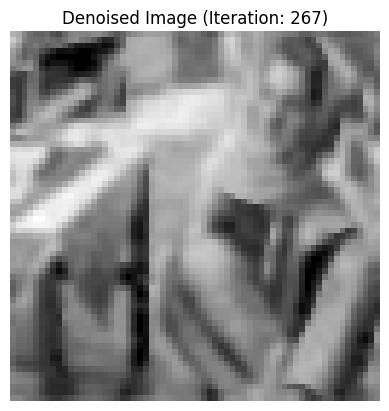

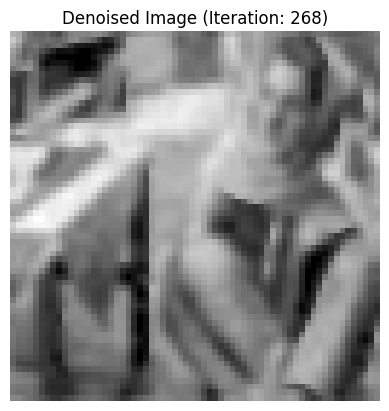

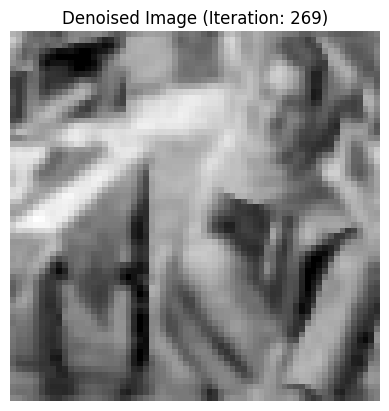

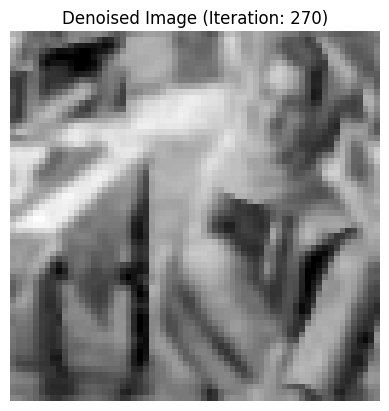

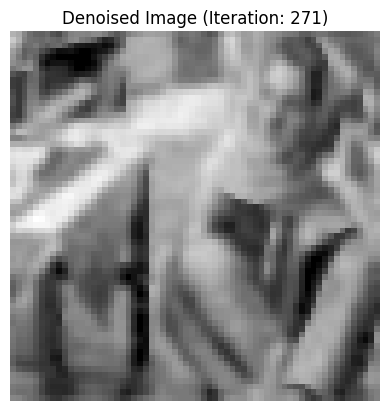

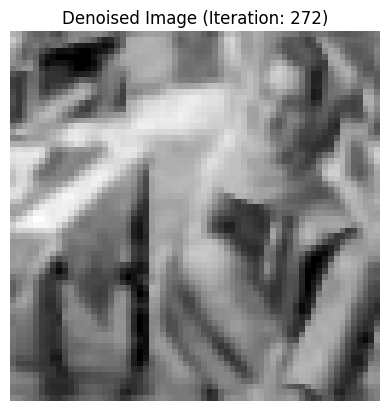

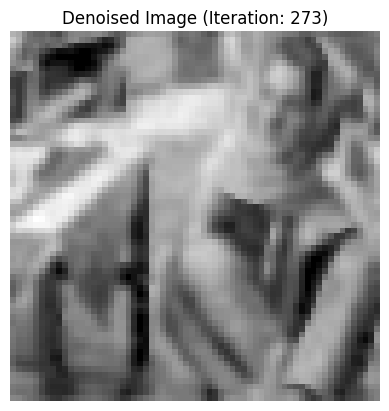

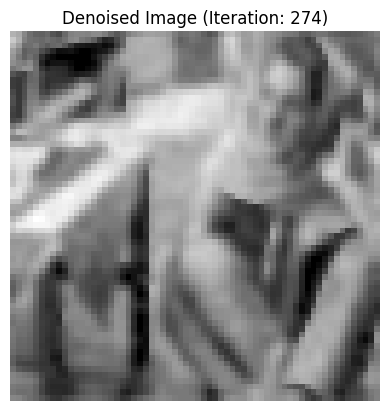

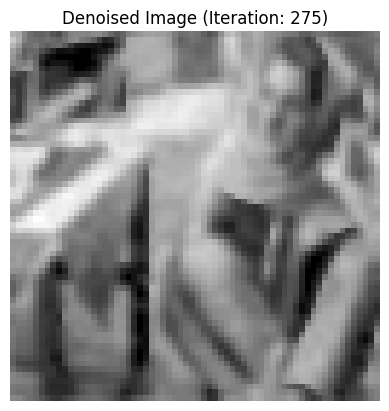

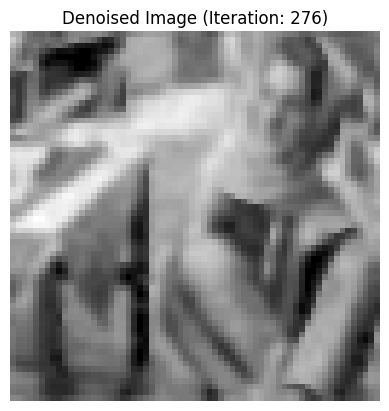

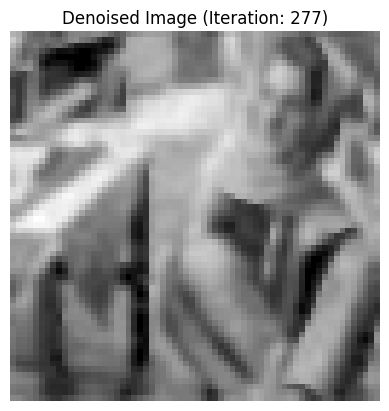

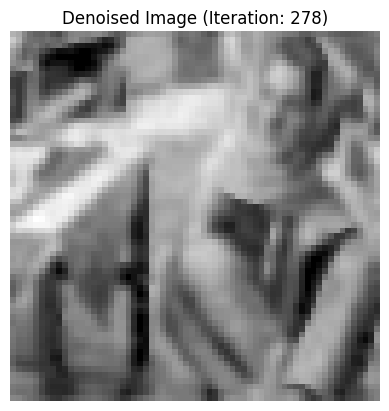

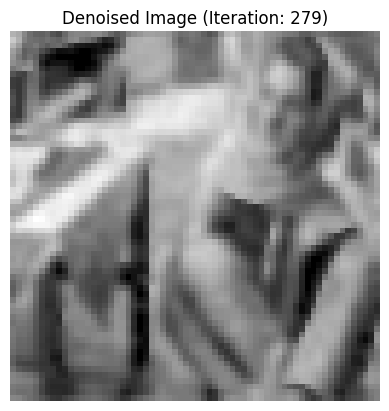

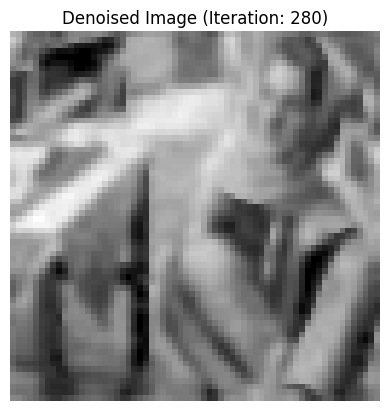

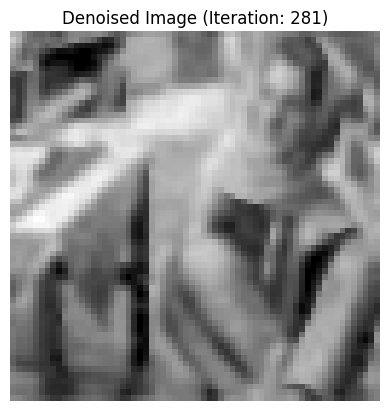

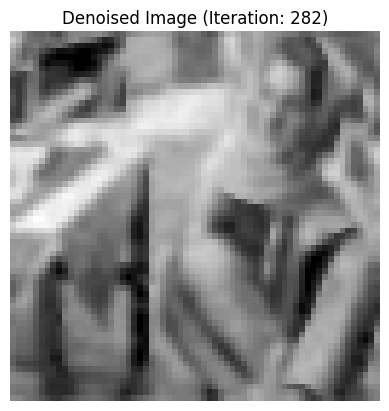

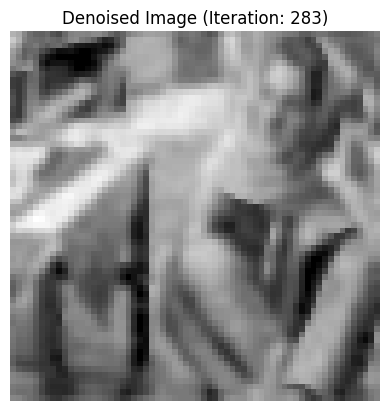

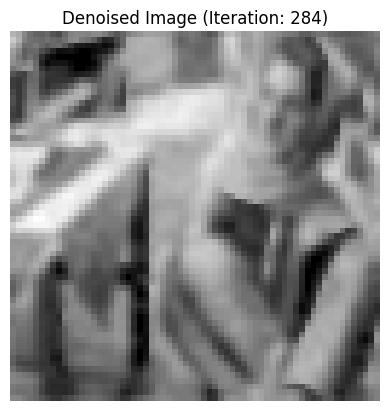

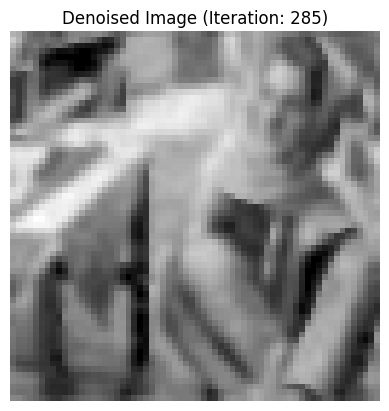

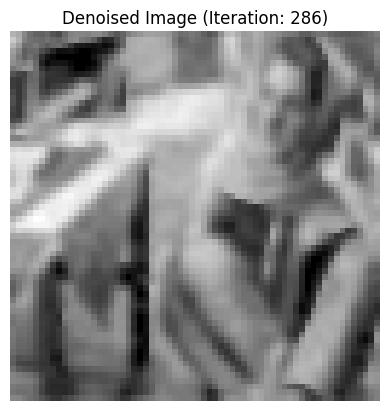

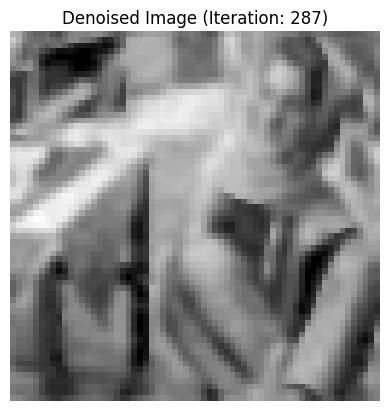

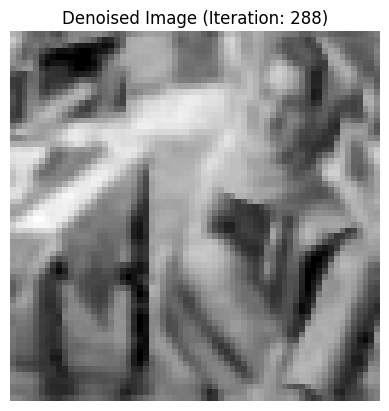

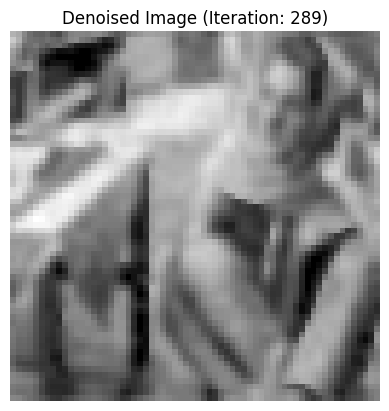

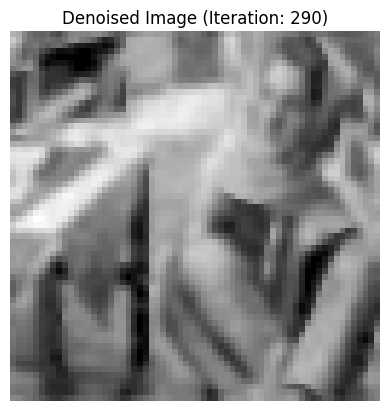

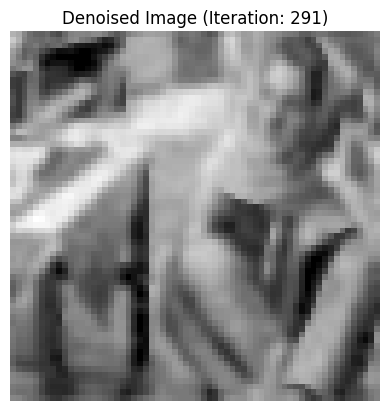

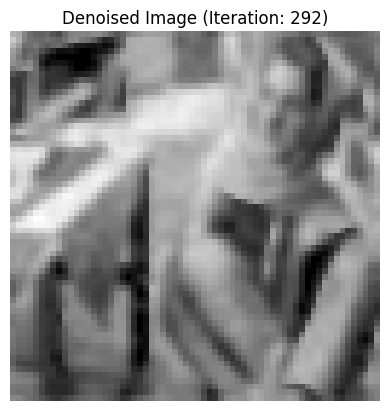

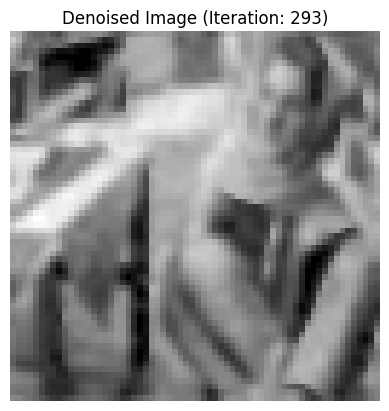

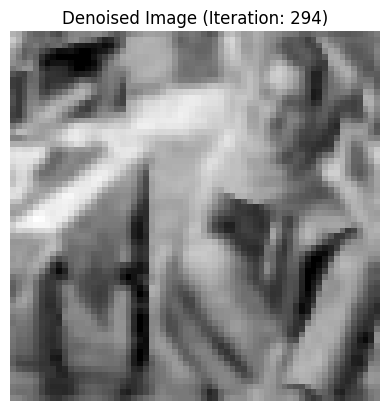

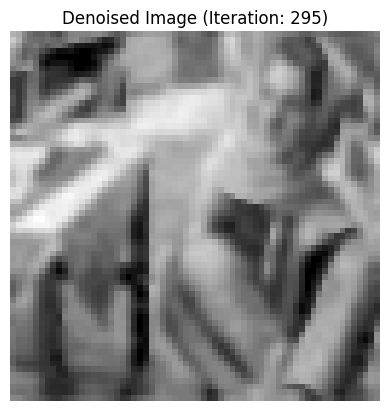

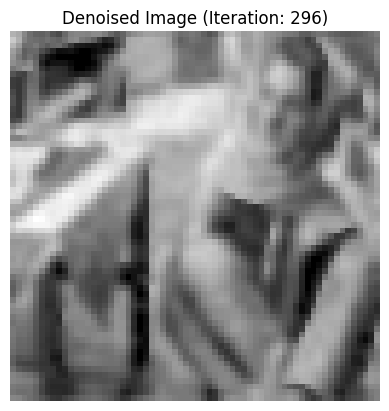

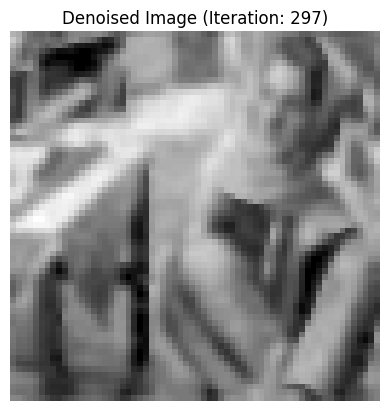

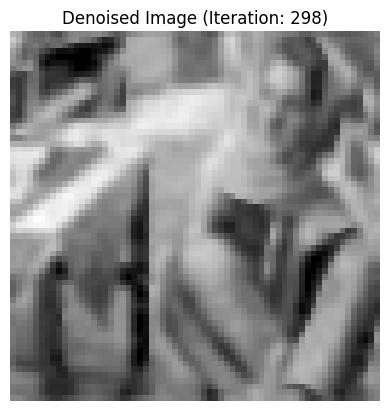

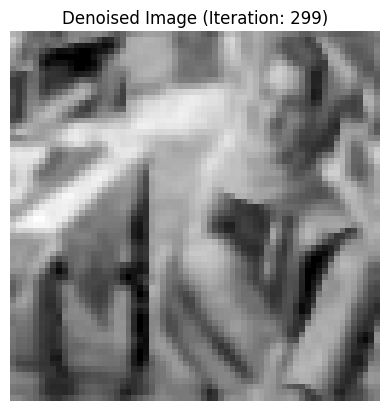

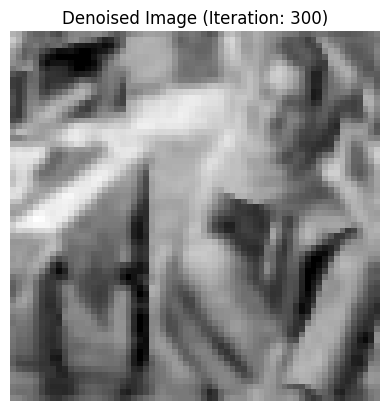

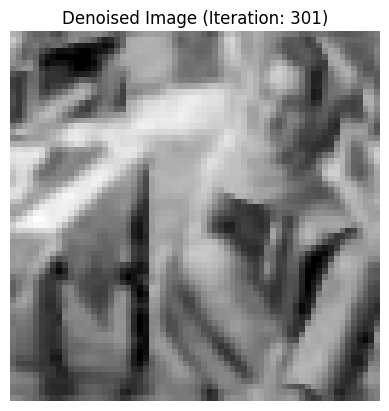

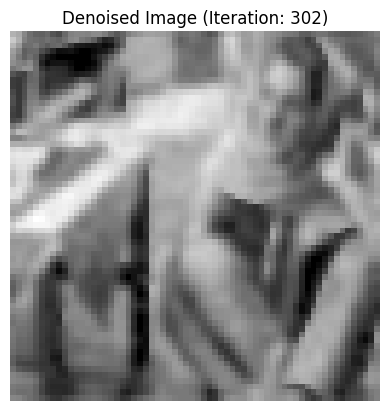

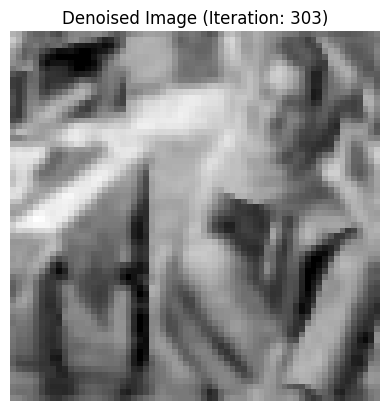

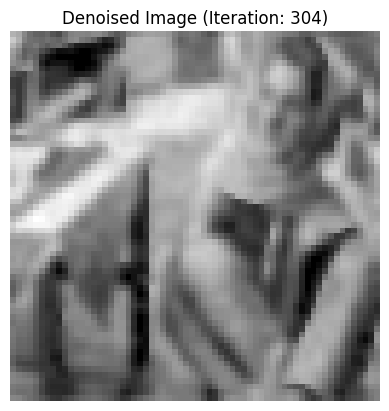

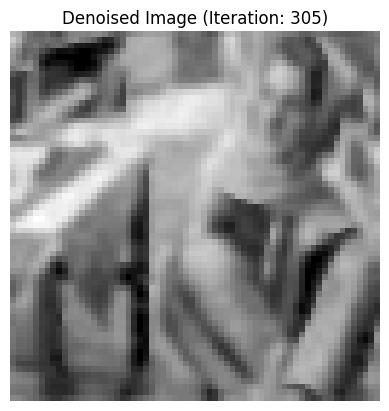

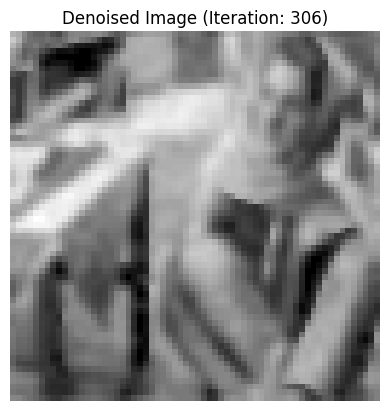

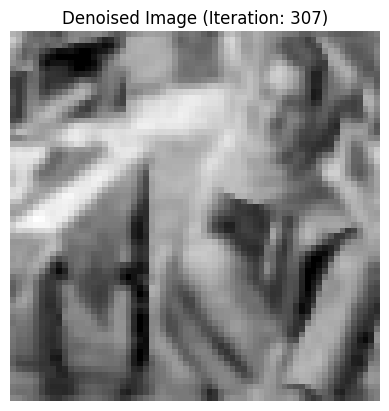

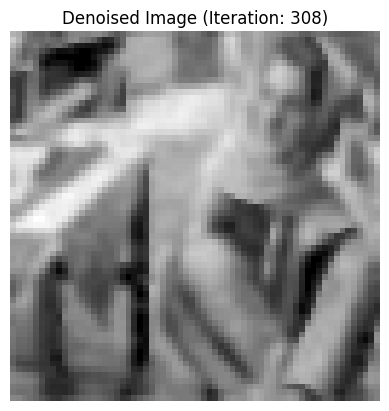

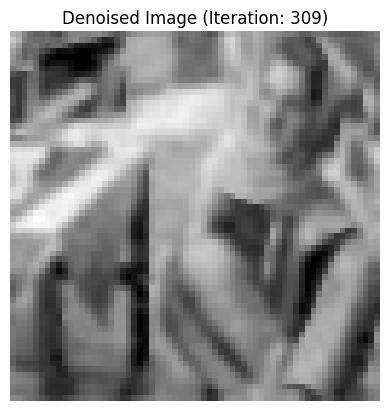

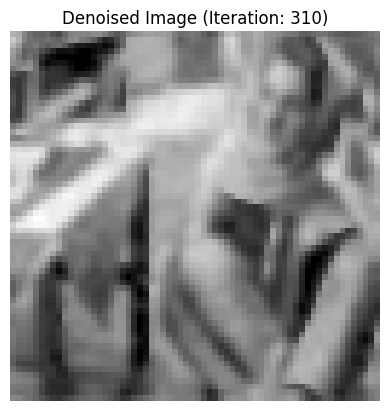

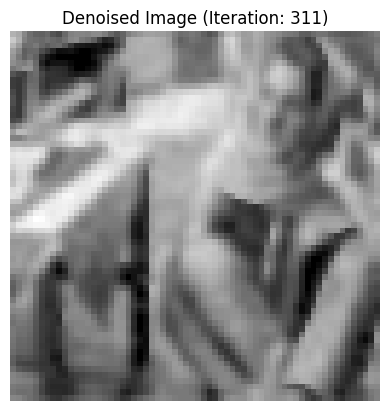

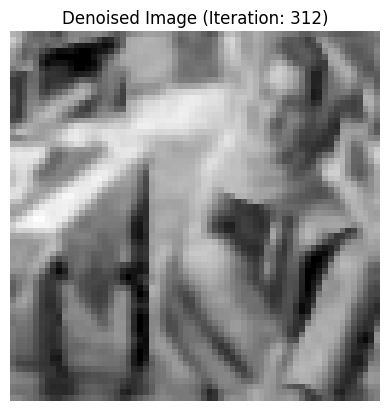

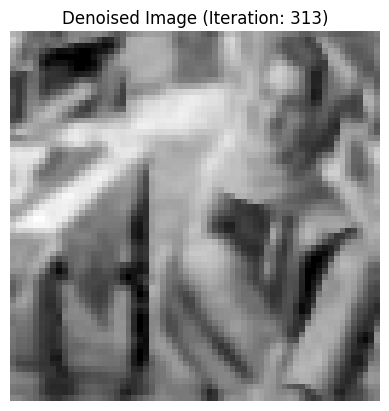

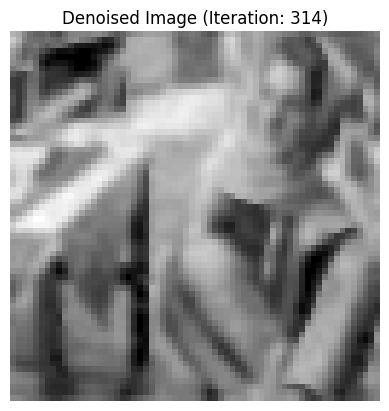

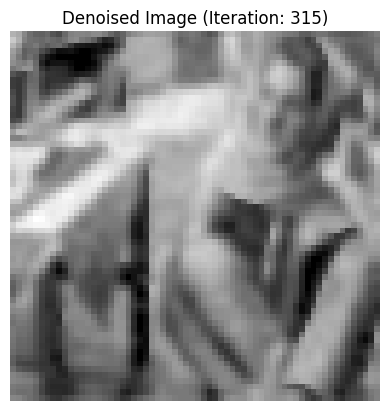

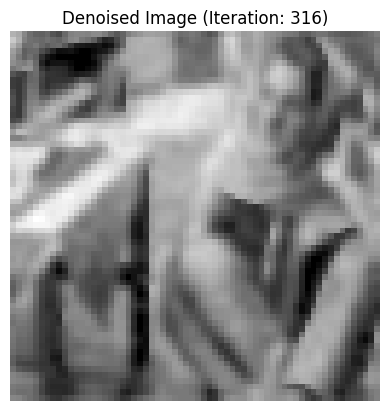

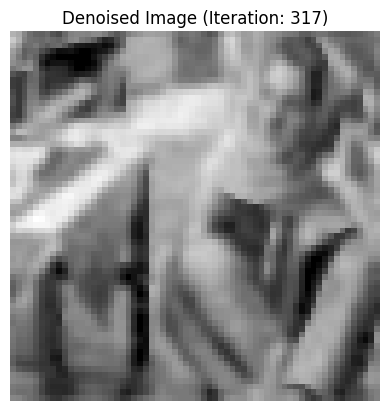

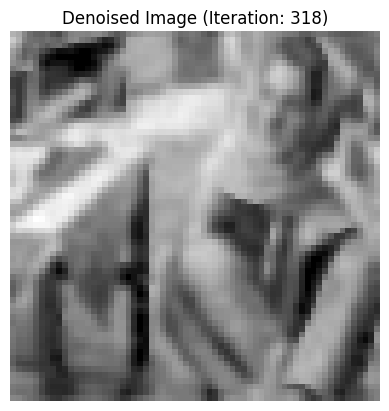

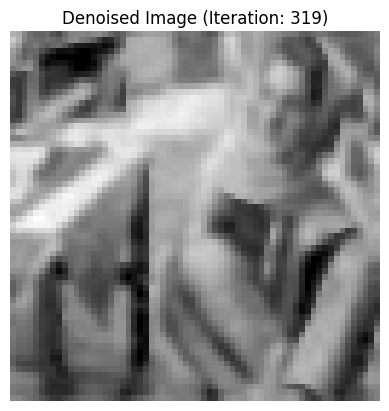

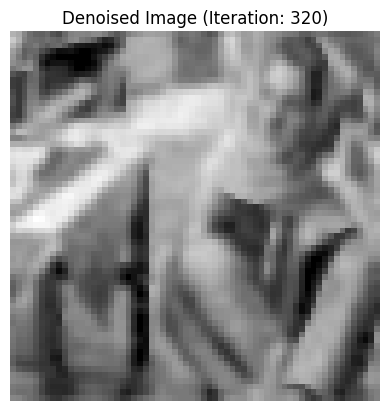

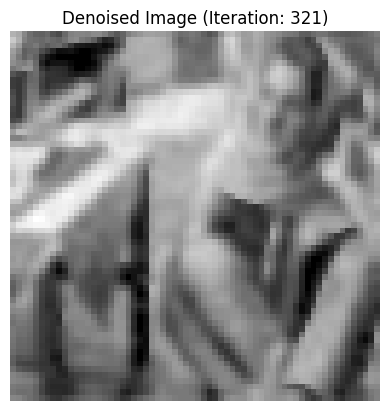

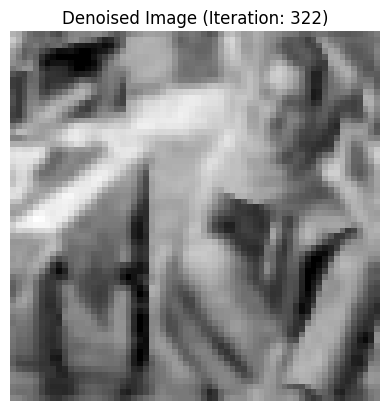

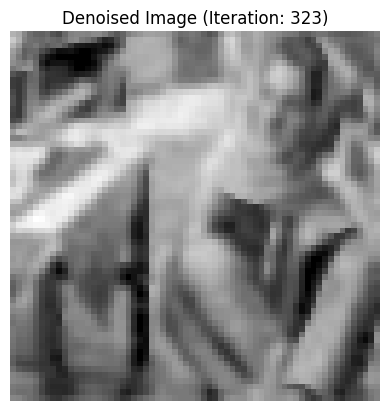

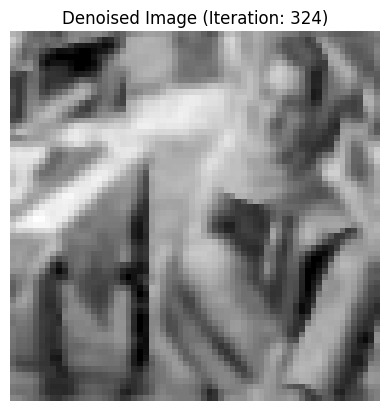

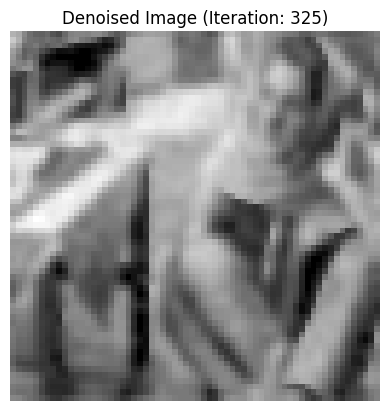

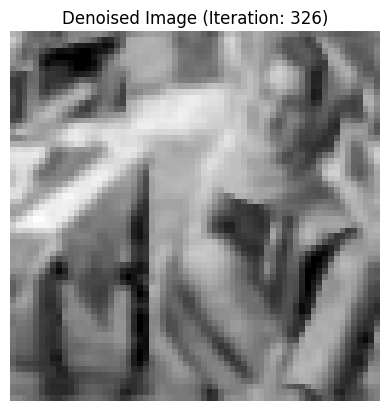

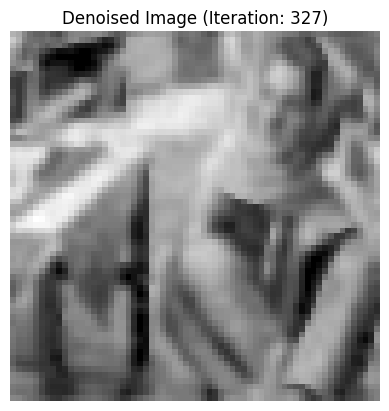

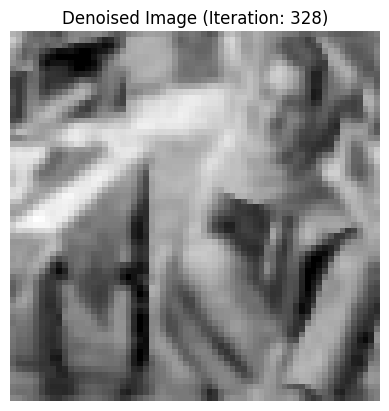

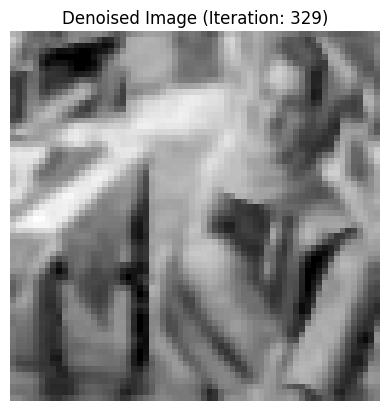

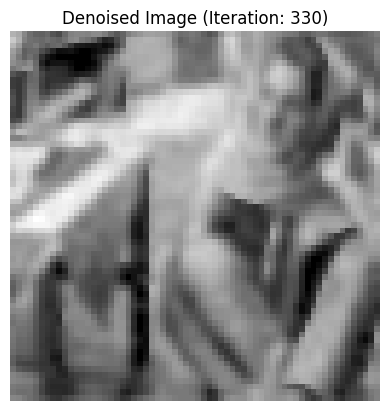

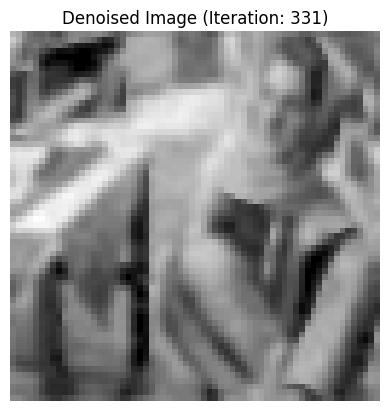

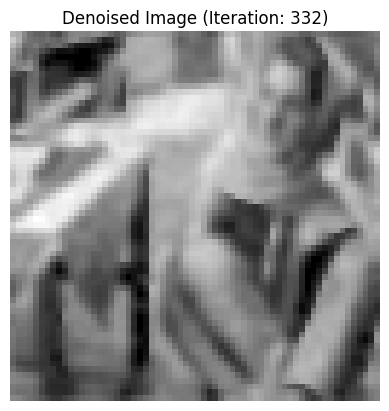

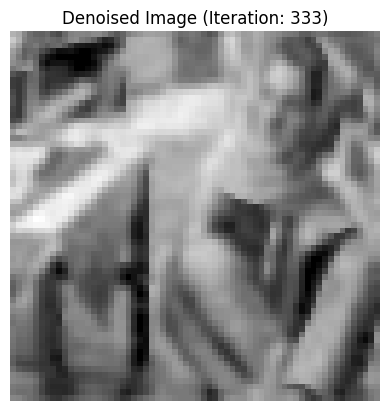

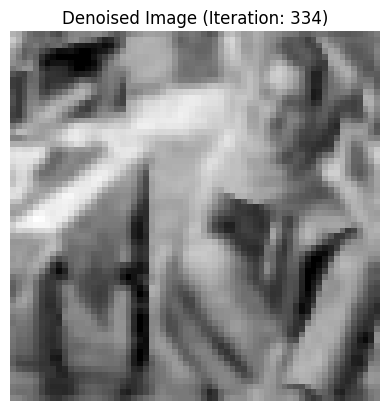

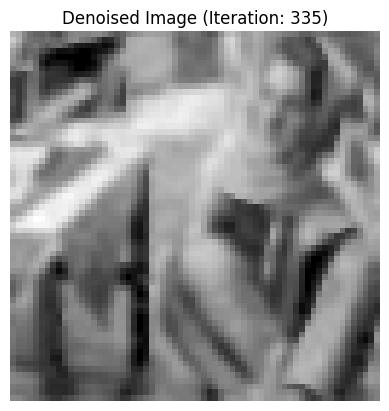

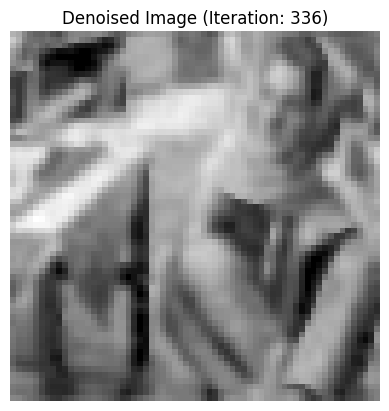

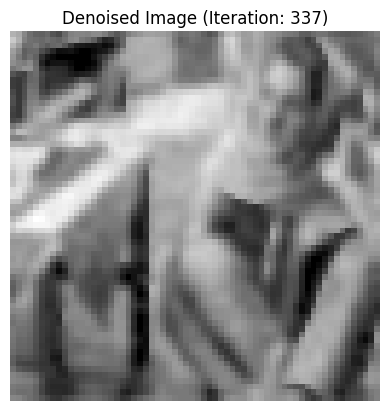

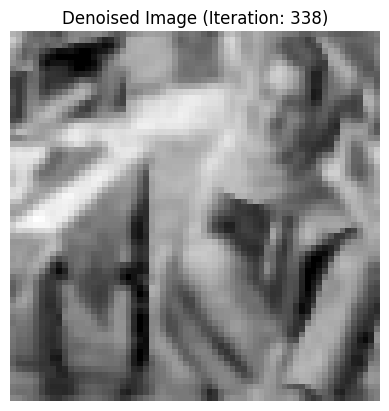

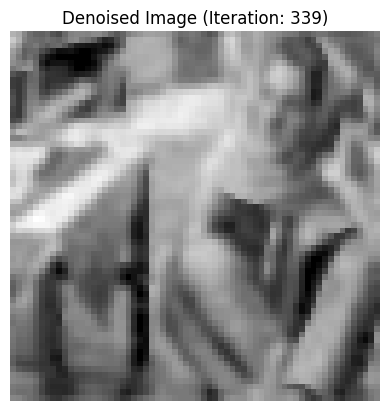

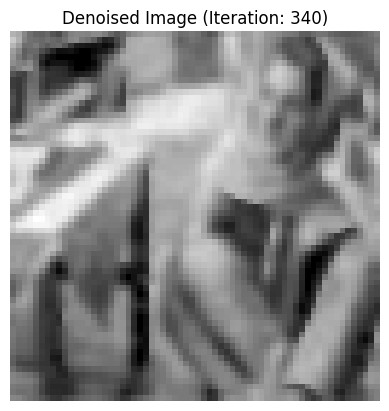

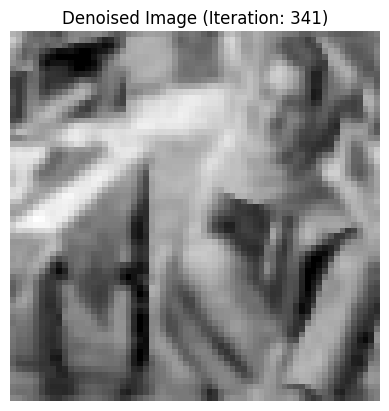

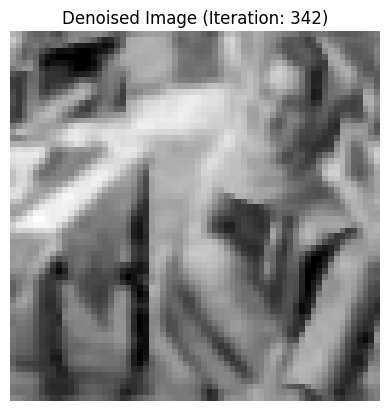

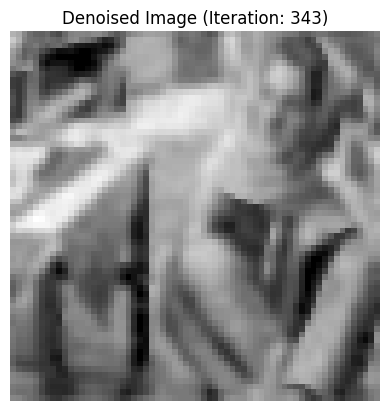

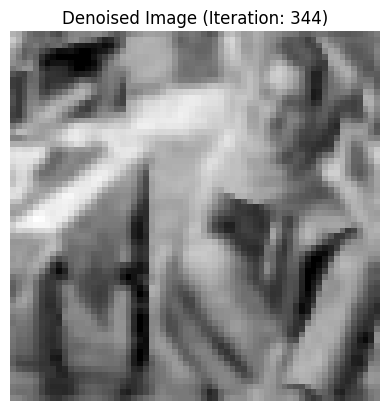

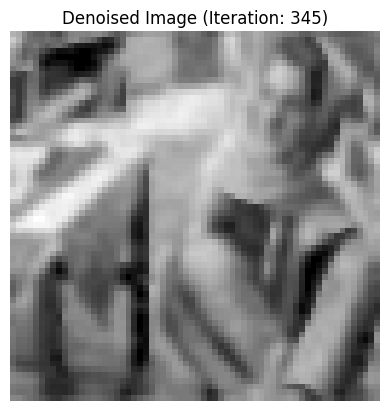

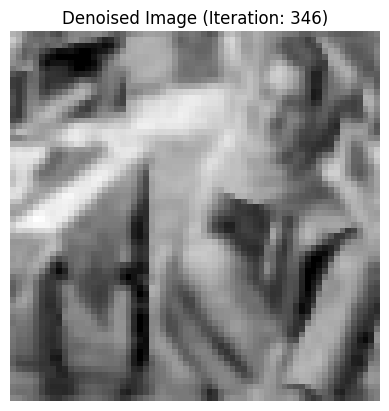

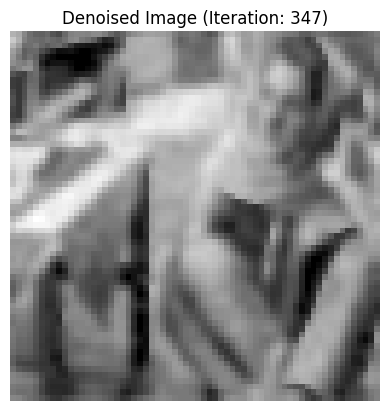

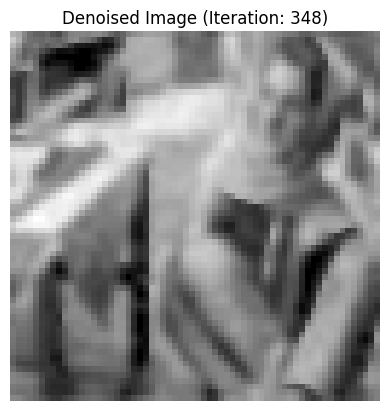

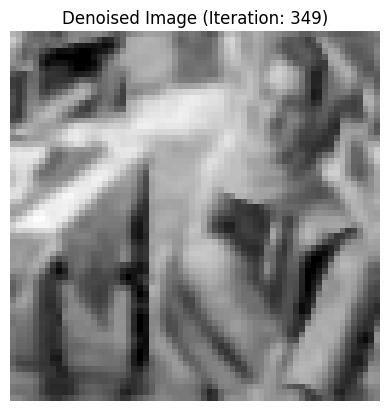

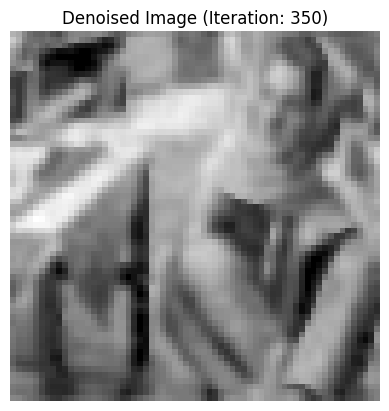

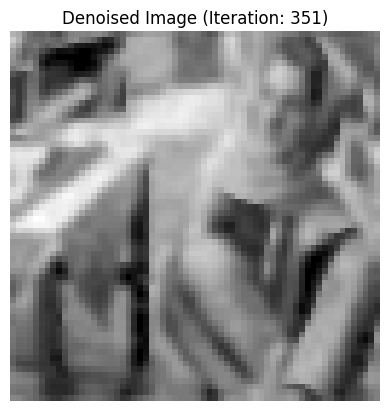

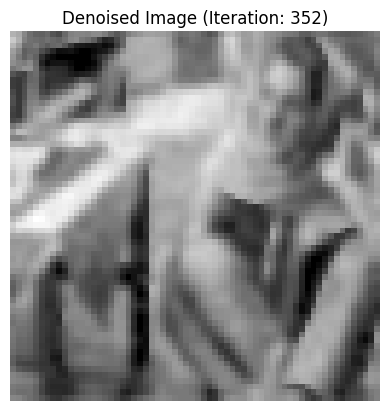

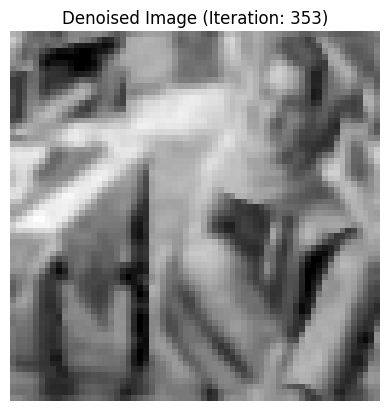

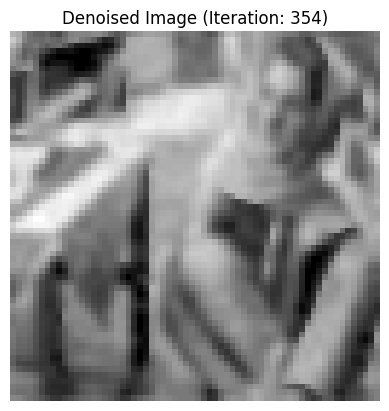

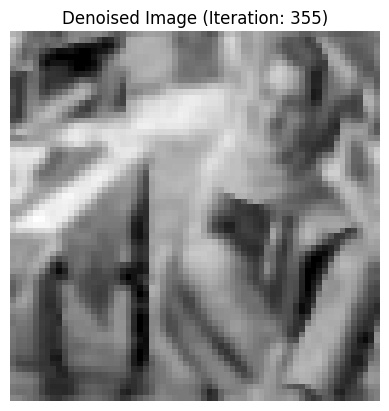

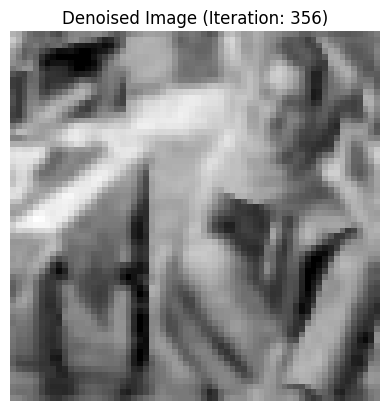

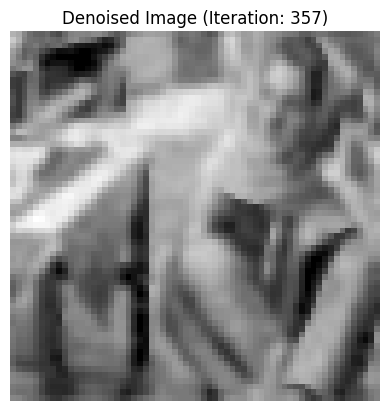

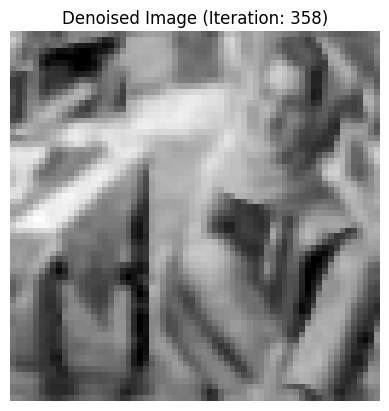

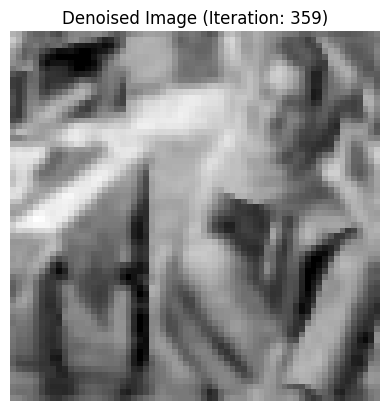

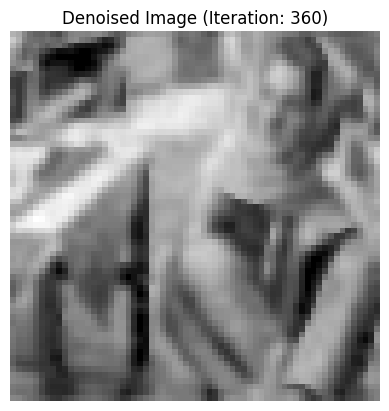

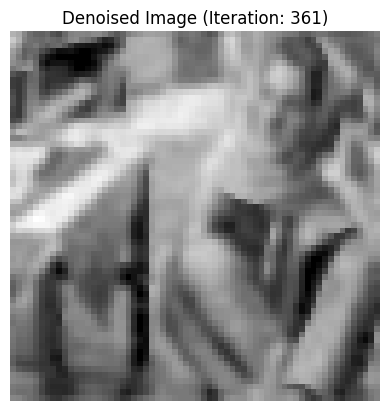

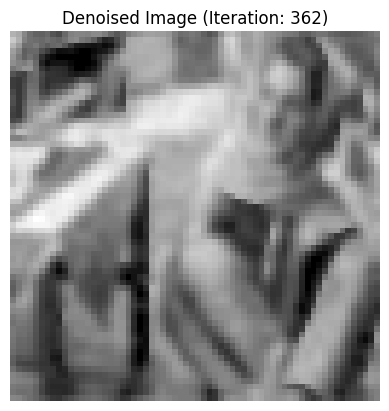

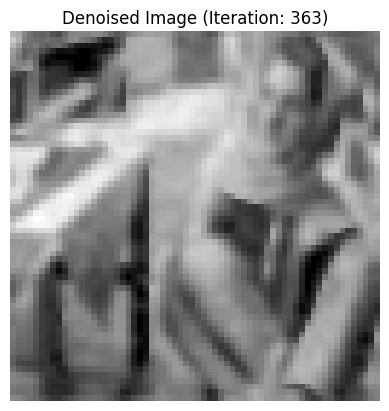

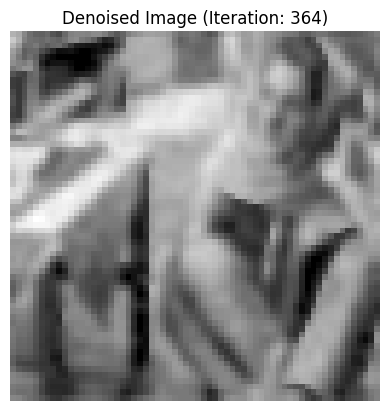

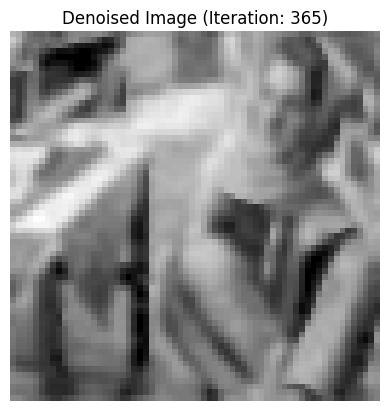

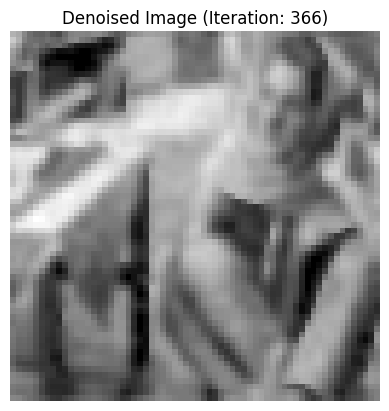

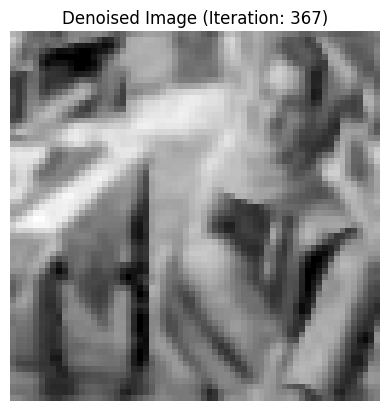

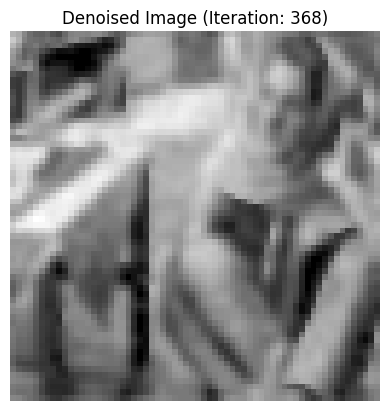

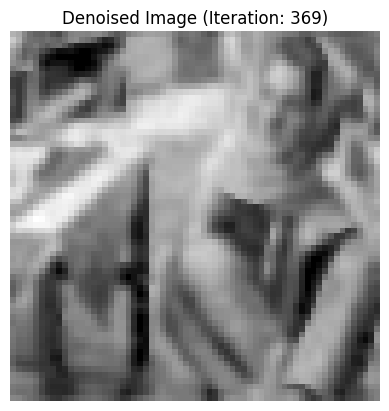

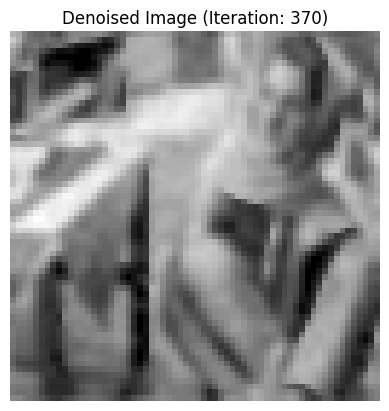

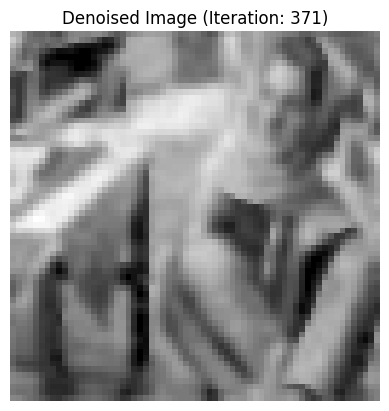

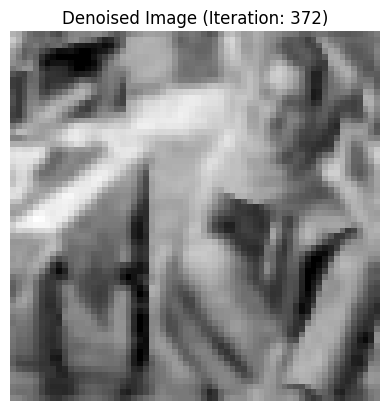

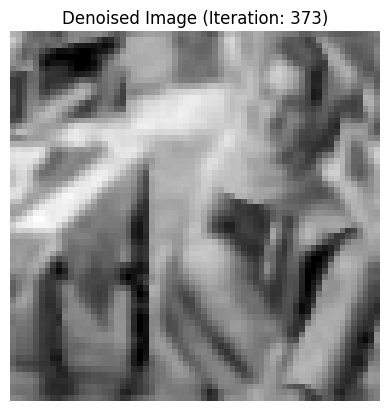

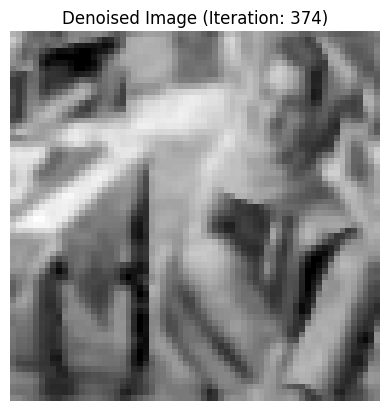

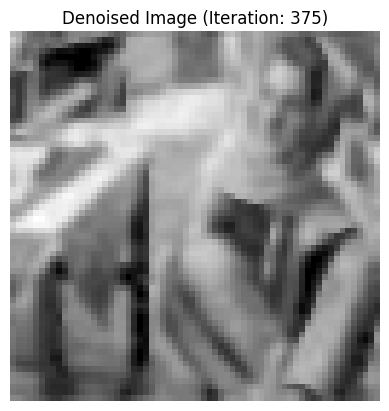

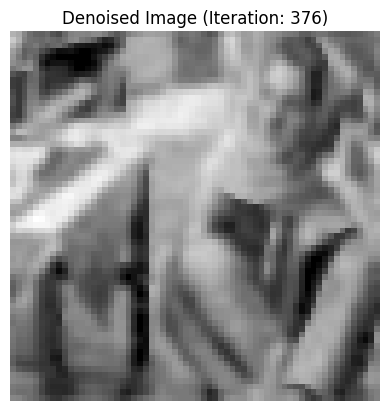

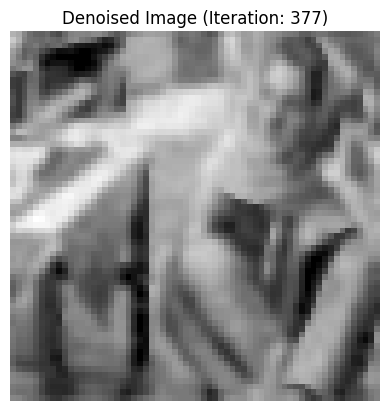

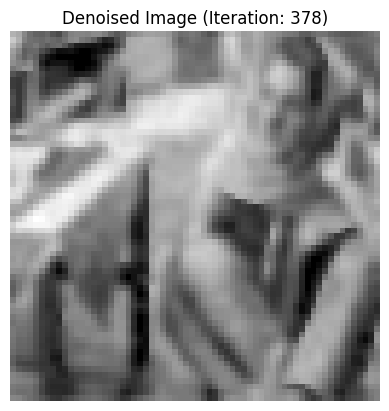

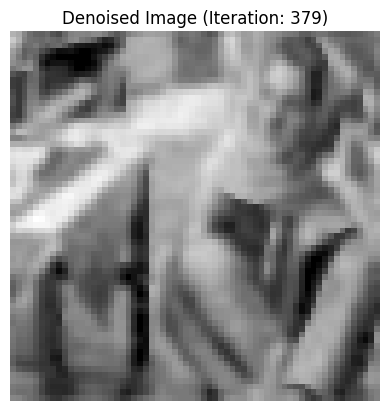

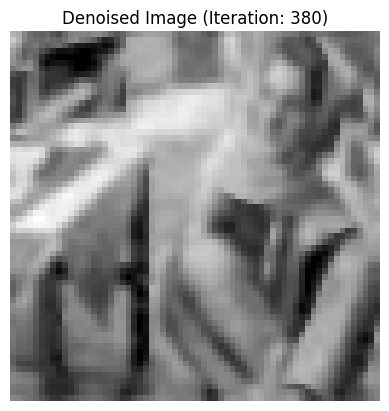

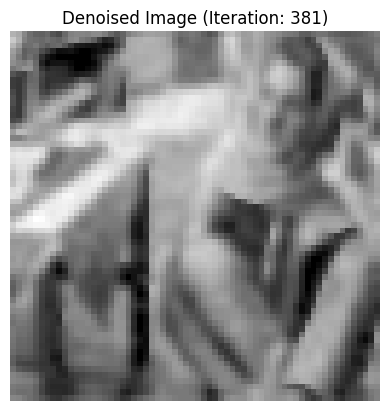

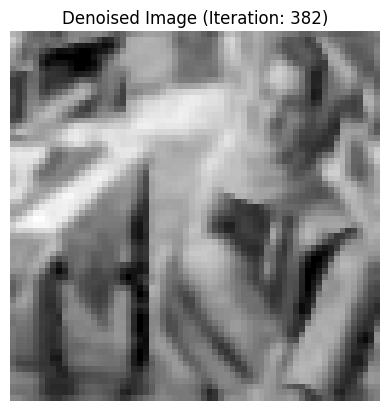

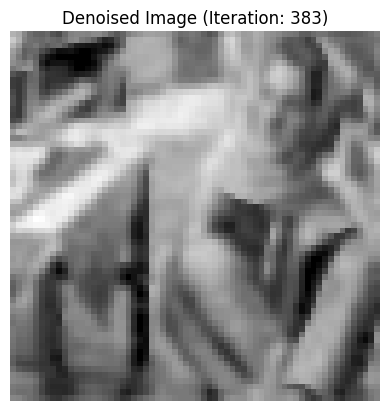

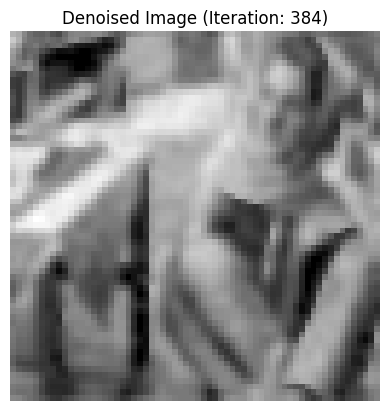

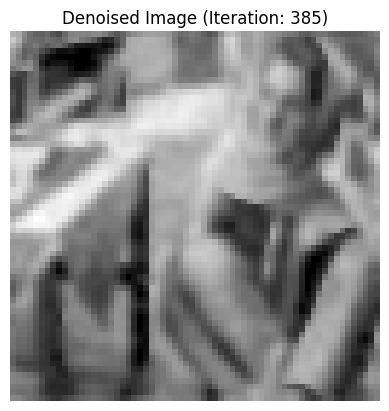

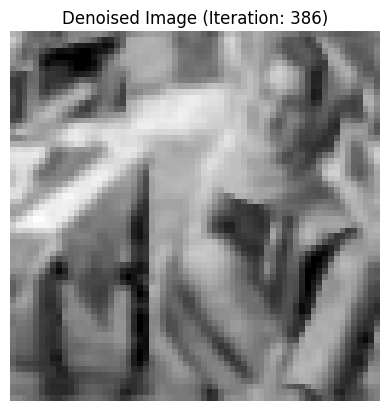

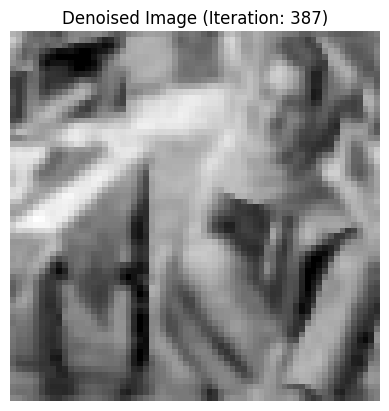

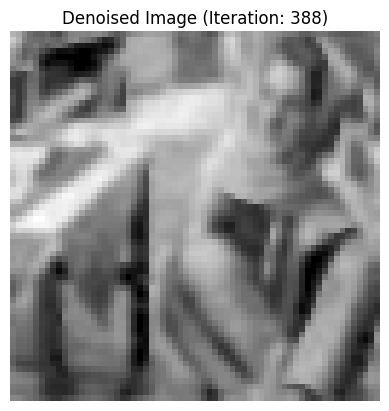

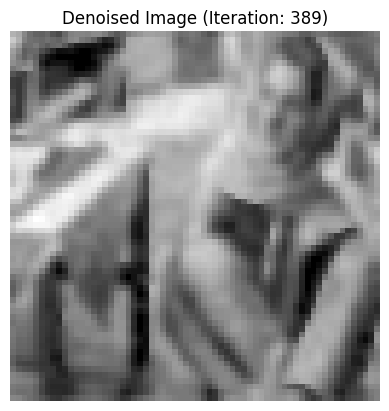

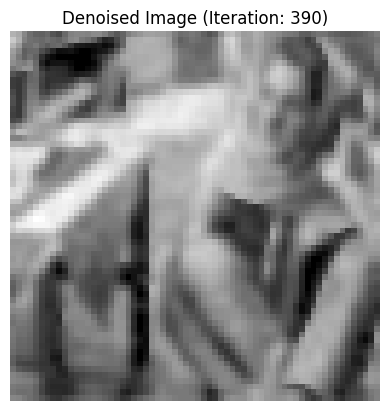

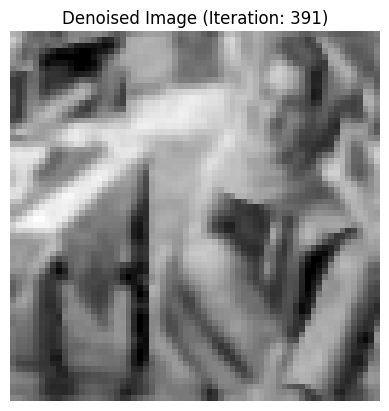

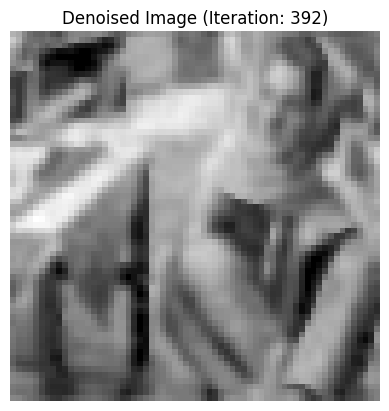

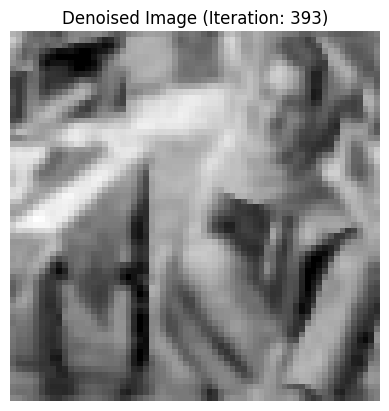

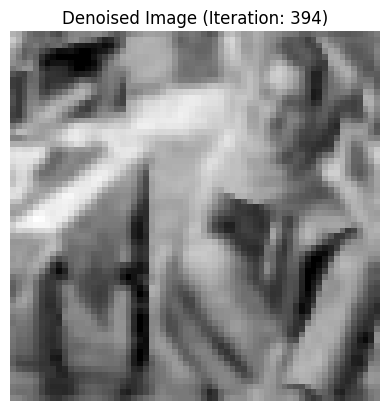

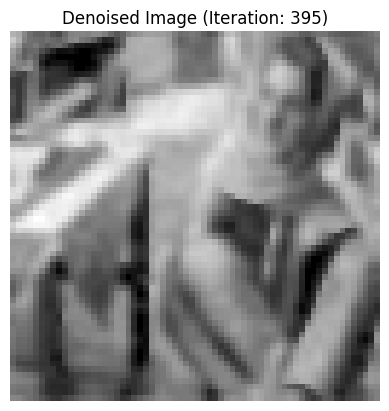

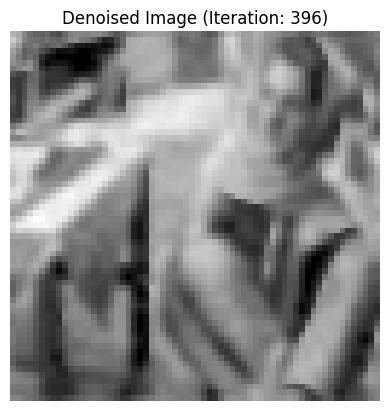

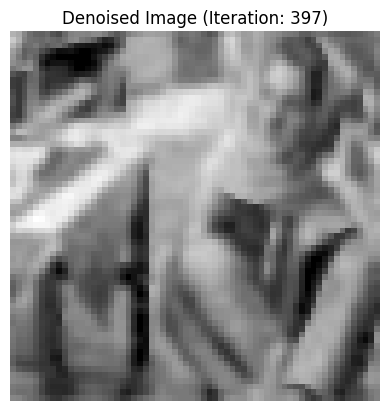

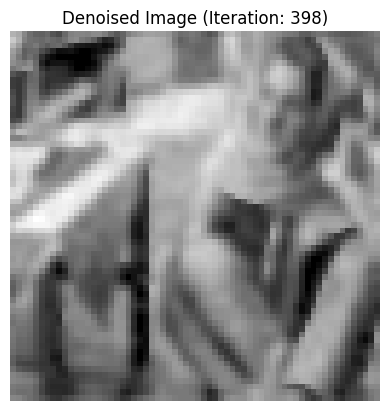

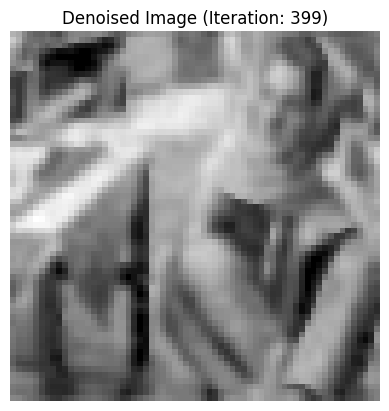

In [30]:
## Optimization
K = 40000
iteration_count = 0
err_list = []
Lambda = 3.4 * sigma
for iter in range(K):
    #print(iter)
    V_coded = W_analysis(A,g,V_coded) # coded info
    V_coded = thresholding(Lambda,V_coded)
    Vc_flat_mat_T = square_to_vector(V_coded, V_flat_mat).T
    V_flat_mat = Vc_flat_mat_T
    #GTV = conv(g,V,0)   #

    ## any good method?
    VGT = V_flat_mat @ G_flat_mat_T  #? G_flat_T = np.zeros((N,r_2)) G_flat_mat_T 

    u,s,v = np.linalg.svd(VGT, full_matrices=False, compute_uv=True, hermitian=False)
    A_flat_mat = (v @ u.T)/r
    A = vector_to_square(A_flat_mat,A)  #? (24)

    ## try denoising
    denoise_image = W_synthesis(A,thresholding(Lambda,W_analysis(A,g,V_coded)),g)
    err_list.append(snr(Image - denoise_image,Image))
    if iter % output_interval == 0:
        # 输出图像
        plt.imshow(denoise_image, cmap='gray')
        plt.title(f'Denoised Image (Iteration: {iteration_count})')
        plt.axis('off')
        plt.show()
        iteration_count += 1

 

In [36]:
err_list_snr = [-snr for snr in err_list]

In [33]:
plt.plot(err_list_snr, label='Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.legend()
plt.show()

TypeError: bad operand type for unary -: 'list'

In [ ]:
## Test1  for conv and corr
#g1,g2
#<a(g1), g2> = <g1,a(-)(g2)>
def test_conv(threshold = 1e-13):
    num_filter = 2
    r=2
    g1 = np.random.randint(0,9,(5,5))
    g2 = np.random.randint(0,9,(5,5))
    a = np.random.randint(1,9,(r,1)).reshape(r,1) 
    a = a / (np.linalg.norm(a)*math.sqrt(num_filter))
    ker = a @ a.T

    p1 = (signal.correlate2d(g1,ker,'same','wrap')*g2).sum()
    p2 = (signal.convolve2d(g2,ker,'same','wrap')*g1).sum()

    difference = abs(p1-p2)
    assert difference < threshold, f"|p1 - p2| = {difference}"
    
    # print(g1)
    # print(g2)
    # print(ker)

for i in range(23333):
    test_conv(1e-12)

In [ ]:
## Test 2
# input: Ort A
num_filter = 4
r=2
A = np.zeros((num_filter,r,r))
# every inner product - 1/numfilter
a1 = np.array([1,1]).reshape(r,1)
a2 = np.array([1,-1]).reshape(r,1)
#a1 /= (np.linalg.norm(a1)*math.sqrt(num_filter))
A[0,:,:] = a1 @ a1.T
#a2 /= (np.linalg.norm(a2)*math.sqrt(num_filter))
A[1,:,:] = a1 @ a2.T
A[2,:,:] = a2 @ a2.T
A[3,:,:] = a2 @ a1.T

for i in range(num_filter):
    A[i,:,:] /= (np.linalg.norm(A[i,:,:])*math.sqrt(num_filter))
D = 5
# image 
g = np.random.randint(0,9,(D,D))
V = np.zeros((num_filter,D,D))
V1 = W_analysis(A,g,V)
g2 = W_synthesis(A,V1,g)
print(np.linalg.norm(g2-g))
g,g2

0.0


(array([[2, 0, 4, 4, 7],
        [1, 0, 1, 5, 0],
        [1, 1, 3, 4, 4],
        [1, 8, 0, 0, 5],
        [3, 7, 3, 5, 1]]),
 array([[2., 0., 4., 4., 7.],
        [1., 0., 1., 5., 0.],
        [1., 1., 3., 4., 4.],
        [1., 8., 0., 0., 5.],
        [3., 7., 3., 5., 1.]]))

In [ ]:
## Test3  for contructing G
